In [1]:
try:
    from tools.utils import EnvironmentDirOptions
except:
    !wget --no-cache -O utils.py -q https://raw.githubusercontent.com/aclicona/Utils/main/MachineLearning/utils.py
    from utils import EnvironmentDirOptions

In [2]:
github_repo_path = "https://github.com/MoisesGuerreroUdeA/Monografia/archive/refs/heads/main-licona.zip"
repo_name = "Monografia"
env_token_key = "GITHUB_TOKEN"
env_dir_options = EnvironmentDirOptions()
env_dir_options.get_repo_from_git(github_repo_path, repo_name, env_token_key)
main_dir = env_dir_options.main_dir

In [3]:
import os
import pandas as pd
from keras import backend
import json

os.environ['LOG_LEVEL'] = 'INFO'
from tools.model_generation.generator import Generator
from tools.model_generation.trainer import Trainer
from tools.model_generation.evaluator import ModelEvaluator
from tools.utils import DataSelectionForEvaluator, load_scaler, save_scaler

In [4]:
dataset = pd.read_feather(os.path.join(main_dir, 'data', 'dataset.feather'))

In [5]:
json_config_path = os.path.join(main_dir, "config/config_models_RNN.json")
file = open(json_config_path, 'r')
model_configurations = json.load(file)

model_generator = Generator()
trainer = Trainer()
model_save_dir = env_dir_options.save_dir_path("models/")

In [6]:
for model_conf in model_configurations:
    backend.clear_session()
    model = model_generator.generate_model(model_conf)
    training_params, scaler_x, scaler_y = trainer.train_model_params(model_conf, dataset, model_save_dir)
    history = model.fit(**training_params)
    trainer.save_history(model.name, history.history, model_save_dir)
    save_scaler(scaler_x, f'{model_save_dir}/{model.name}_scaler_x.pkl')
    save_scaler(scaler_y, f'{model_save_dir}/{model.name}_scaler_y.pkl')

2024-06-05 19:21:15,340 WARNING From c:\Users\Moisés Guerrero\.virtualenvs\Monografia-OKFRz4jC\Lib\site-packages\keras\src\backend\common\global_state.py:82: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

2024-06-05 19:21:15,560 INFO Adding a Input layer to the model with name input_1
2024-06-05 19:21:15,563 INFO Configuring input shape = (48, 11)
2024-06-05 19:21:15,567 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-05 19:21:15,711 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-05 19:21:15,721 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-05 19:21:15,755 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-05 19:21:15,763 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-05 19:21:15,794 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-05 19:21:15,807 INFO Adding a Simple_rnn layer to the model 

Model: "RNN_1_look48_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 48, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 48, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 48, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-05 19:21:15,949 INFO Starting training for all available models...
2024-06-05 19:21:15,950 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-05 19:21:15,952 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-05 19:21:16,029 WARNING Output column should by the first column on dataset!
2024-06-05 19:21:16,036 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-05 19:21:16,723 INFO 
-----------------------------
X Train shape: (110348, 48, 11) 
y Train shape: (110348, 48) 
X Test shape: (47238, 48, 11) 
y Test shape: (47238, 48) 
-----------------------------

2024-06-05 19:21:16,726 INFO Model with name RNN_1_look48_overlap1 will be saved on directory ./models/...


Epoch 1/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 248s 70ms/step - loss: 0.0085 - mae: 0.0863 - mse: 0.0170 - val_loss: 0.0104 - val_mae: 0.0953 - val_mse: 0.0208
Epoch 2/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 235s 68ms/step - loss: 0.0057 - mae: 0.0692 - mse: 0.0113 - val_loss: 0.0098 - val_mae: 0.0936 - val_mse: 0.0197
Epoch 3/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 236s 69ms/step - loss: 0.0055 - mae: 0.0683 - mse: 0.0109 - val_loss: 0.0097 - val_mae: 0.0930 - val_mse: 0.0194
Epoch 4/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 236s 68ms/step - loss: 0.0053 - mae: 0.0669 - mse: 0.0105 - val_loss: 0.0095 - val_mae: 0.0921 - val_mse: 0.0189
Epoch 5/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 239s 69ms/step - loss: 0.0054 - mae: 0.0677 - mse: 0.0107 - val_loss: 0.0098 - val_mae: 0.0941 - val_mse: 0.0196
Epoch 6/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 241s 70ms/step - loss: 0.0055 - mae: 0.0688 - mse: 0.0109 - val_loss: 0.0094 - val_mae: 0.0916 - val_mse: 0.0189
Epoch 7/50
3449/3449 ━━━━━━━━━━━━━━━━━━━━ 243s 70ms/step - loss: 0.005

2024-06-05 21:12:56,045 INFO Saving model RNN_1_look48_overlap1 history on directory ./models/
2024-06-05 21:12:56,050 INFO History file was successfully wrote for model RNN_1_look48_overlap1!
2024-06-05 21:12:56,870 INFO Adding a Input layer to the model with name input_1
2024-06-05 21:12:56,871 INFO Configuring input shape = (72, 11)
2024-06-05 21:12:56,873 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-05 21:12:56,925 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-05 21:12:56,933 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-05 21:12:56,965 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-05 21:12:56,976 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-05 21:12:57,011 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-05 21:12:57,025 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-05 21:12:57,062 INFO Adding a Dropo

Model: "RNN_1_look72_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 72, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 72, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 72, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 72, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-05 21:12:57,157 INFO Starting training for all available models...
2024-06-05 21:12:57,158 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-05 21:12:57,159 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-05 21:12:57,255 WARNING Output column should by the first column on dataset!
2024-06-05 21:12:57,261 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-05 21:12:58,283 INFO 
-----------------------------
X Train shape: (110324, 72, 11) 
y Train shape: (110324, 48) 
X Test shape: (47214, 72, 11) 
y Test shape: (47214, 48) 
-----------------------------

2024-06-05 21:12:58,287 INFO Model with name RNN_1_look72_overlap1 will be saved on directory ./models/...


Epoch 1/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 315s 90ms/step - loss: 0.0080 - mae: 0.0840 - mse: 0.0159 - val_loss: 0.0109 - val_mae: 0.1011 - val_mse: 0.0218
Epoch 2/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 309s 90ms/step - loss: 0.0057 - mae: 0.0705 - mse: 0.0114 - val_loss: 0.0094 - val_mae: 0.0917 - val_mse: 0.0188
Epoch 3/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 667s 194ms/step - loss: 0.0053 - mae: 0.0676 - mse: 0.0107 - val_loss: 0.0090 - val_mae: 0.0897 - val_mse: 0.0180
Epoch 4/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 369s 95ms/step - loss: 0.0052 - mae: 0.0666 - mse: 0.0105 - val_loss: 0.0089 - val_mae: 0.0885 - val_mse: 0.0178
Epoch 5/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 369s 91ms/step - loss: 0.0052 - mae: 0.0665 - mse: 0.0105 - val_loss: 0.0087 - val_mae: 0.0885 - val_mse: 0.0174
Epoch 6/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 331s 96ms/step - loss: 0.0051 - mae: 0.0651 - mse: 0.0102 - val_loss: 0.0085 - val_mae: 0.0889 - val_mse: 0.0171
Epoch 7/50
3448/3448 ━━━━━━━━━━━━━━━━━━━━ 386s 97ms/step - loss: 0.00

2024-06-05 22:51:08,156 INFO Saving model RNN_1_look72_overlap1 history on directory ./models/
2024-06-05 22:51:08,201 INFO History file was successfully wrote for model RNN_1_look72_overlap1!
2024-06-05 22:51:09,639 INFO Adding a Input layer to the model with name input_1
2024-06-05 22:51:09,640 INFO Configuring input shape = (96, 11)
2024-06-05 22:51:09,642 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-05 22:51:09,731 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-05 22:51:09,739 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-05 22:51:09,789 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-05 22:51:09,809 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-05 22:51:09,853 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-05 22:51:09,872 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-05 22:51:09,916 INFO Adding a Dropo

Model: "RNN_1_look96_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 96, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 96, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 96, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-05 22:51:10,023 INFO Starting training for all available models...
2024-06-05 22:51:10,025 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-05 22:51:10,026 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-05 22:51:10,237 WARNING Output column should by the first column on dataset!
2024-06-05 22:51:10,244 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-05 22:51:11,686 INFO 
-----------------------------
X Train shape: (110300, 96, 11) 
y Train shape: (110300, 48) 
X Test shape: (47190, 96, 11) 
y Test shape: (47190, 48) 
-----------------------------

2024-06-05 22:51:11,695 INFO Model with name RNN_1_look96_overlap1 will be saved on directory ./models/...


Epoch 1/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 575s 164ms/step - loss: 0.0084 - mae: 0.0861 - mse: 0.0168 - val_loss: 0.0102 - val_mae: 0.0943 - val_mse: 0.0203
Epoch 2/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 547s 159ms/step - loss: 0.0055 - mae: 0.0687 - mse: 0.0110 - val_loss: 0.0094 - val_mae: 0.0916 - val_mse: 0.0187
Epoch 3/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 583s 165ms/step - loss: 0.0053 - mae: 0.0673 - mse: 0.0106 - val_loss: 0.0090 - val_mae: 0.0904 - val_mse: 0.0180
Epoch 4/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 591s 155ms/step - loss: 0.0053 - mae: 0.0676 - mse: 0.0106 - val_loss: 0.0091 - val_mae: 0.0908 - val_mse: 0.0181
Epoch 5/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 574s 159ms/step - loss: 0.0052 - mae: 0.0663 - mse: 0.0104 - val_loss: 0.0091 - val_mae: 0.0912 - val_mse: 0.0183
Epoch 6/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 487s 141ms/step - loss: 0.0051 - mae: 0.0656 - mse: 0.0101 - val_loss: 0.0090 - val_mae: 0.0892 - val_mse: 0.0179
Epoch 7/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 472s 133ms/step - loss

2024-06-06 03:23:55,502 INFO Saving model RNN_1_look96_overlap1 history on directory ./models/
2024-06-06 03:23:55,517 INFO History file was successfully wrote for model RNN_1_look96_overlap1!
2024-06-06 03:23:56,868 INFO Adding a Input layer to the model with name input_1
2024-06-06 03:23:56,869 INFO Configuring input shape = (48, 11)
2024-06-06 03:23:56,871 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-06 03:23:56,953 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-06 03:23:56,960 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-06 03:23:57,015 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-06 03:23:57,034 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-06 03:23:57,083 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-06 03:23:57,103 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-06 03:23:57,162 INFO Adding a Dropo

Model: "RNN_1_look48_overlap24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 48, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 48, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 48, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 03:23:57,281 INFO Starting training for all available models...
2024-06-06 03:23:57,281 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 03:23:57,283 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 03:23:57,408 WARNING Output column should by the first column on dataset!
2024-06-06 03:23:57,413 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 03:23:57,474 INFO 
-----------------------------
X Train shape: (4598, 48, 11) 
y Train shape: (4598, 48) 
X Test shape: (1969, 48, 11) 
y Test shape: (1969, 48) 
-----------------------------

2024-06-06 03:23:57,478 INFO Model with name RNN_1_look48_overlap24 will be saved on directory ./models/...


Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 26s 120ms/step - loss: 0.0315 - mae: 0.1715 - mse: 0.0630 - val_loss: 0.0226 - val_mae: 0.1383 - val_mse: 0.0453
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - loss: 0.0117 - mae: 0.1049 - mse: 0.0234 - val_loss: 0.0172 - val_mae: 0.1233 - val_mse: 0.0344
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0087 - mae: 0.0901 - mse: 0.0173 - val_loss: 0.0161 - val_mae: 0.1202 - val_mse: 0.0321
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0067 - mae: 0.0792 - mse: 0.0135 - val_loss: 0.0153 - val_mae: 0.1164 - val_mse: 0.0306
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0063 - mae: 0.0746 - mse: 0.0125 - val_loss: 0.0204 - val_mae: 0.1351 - val_mse: 0.0408
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - loss: 0.0069 - mae: 0.0756 - mse: 0.0137 - val_loss: 0.0203 - val_mae: 0.1315 - val_mse: 0.0406
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - loss: 0.0063 - mae: 0.0723

2024-06-06 03:26:18,490 INFO Saving model RNN_1_look48_overlap24 history on directory ./models/
2024-06-06 03:26:18,493 INFO History file was successfully wrote for model RNN_1_look48_overlap24!
2024-06-06 03:26:18,902 INFO Adding a Input layer to the model with name input_1
2024-06-06 03:26:18,903 INFO Configuring input shape = (72, 11)
2024-06-06 03:26:18,904 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-06 03:26:18,977 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-06 03:26:18,984 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-06 03:26:19,028 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-06 03:26:19,038 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-06 03:26:19,097 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-06 03:26:19,121 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-06 03:26:19,193 INFO Adding a Dro

Model: "RNN_1_look72_overlap36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 72, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 72, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 72, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 72, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 03:26:19,297 INFO Starting training for all available models...
2024-06-06 03:26:19,298 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 03:26:19,299 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 03:26:19,383 WARNING Output column should by the first column on dataset!
2024-06-06 03:26:19,394 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 03:26:19,439 INFO 
-----------------------------
X Train shape: (3065, 72, 11) 
y Train shape: (3065, 48) 
X Test shape: (1312, 72, 11) 
y Test shape: (1312, 48) 
-----------------------------

2024-06-06 03:26:19,445 INFO Model with name RNN_1_look72_overlap36 will be saved on directory ./models/...


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - loss: 0.0372 - mae: 0.1929 - mse: 0.0745 - val_loss: 0.0188 - val_mae: 0.1371 - val_mse: 0.0376
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0164 - mae: 0.1305 - mse: 0.0328 - val_loss: 0.0165 - val_mae: 0.1215 - val_mse: 0.0331
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - loss: 0.0104 - mae: 0.1018 - mse: 0.0209 - val_loss: 0.0149 - val_mae: 0.1195 - val_mse: 0.0298
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - loss: 0.0076 - mae: 0.0886 - mse: 0.0153 - val_loss: 0.0155 - val_mae: 0.1223 - val_mse: 0.0311
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - loss: 0.0069 - mae: 0.0824 - mse: 0.0137 - val_loss: 0.0155 - val_mae: 0.1190 - val_mse: 0.0309
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - loss: 0.0073 - mae: 0.0831 - mse: 0.0147 - val_loss: 0.0264 - val_mae: 0.1543 - val_mse: 0.0528
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - loss: 0.0091 - mae: 0.0912 - mse: 0.018

2024-06-06 03:28:14,114 INFO Saving model RNN_1_look72_overlap36 history on directory ./models/
2024-06-06 03:28:14,117 INFO History file was successfully wrote for model RNN_1_look72_overlap36!
2024-06-06 03:28:14,558 INFO Adding a Input layer to the model with name input_1
2024-06-06 03:28:14,559 INFO Configuring input shape = (96, 11)
2024-06-06 03:28:14,562 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-06 03:28:14,667 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-06 03:28:14,680 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-06 03:28:14,746 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-06 03:28:14,769 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-06 03:28:14,817 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-06 03:28:14,832 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-06 03:28:14,910 INFO Adding a Dro

Model: "RNN_1_look96_overlap48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 96, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 96, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 96, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 03:28:15,032 INFO Starting training for all available models...
2024-06-06 03:28:15,033 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 03:28:15,034 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 03:28:15,105 WARNING Output column should by the first column on dataset!
2024-06-06 03:28:15,118 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 03:28:15,228 INFO 
-----------------------------
X Train shape: (2298, 96, 11) 
y Train shape: (2298, 48) 
X Test shape: (984, 96, 11) 
y Test shape: (984, 48) 
-----------------------------

2024-06-06 03:28:15,234 INFO Model with name RNN_1_look96_overlap48 will be saved on directory ./models/...


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - loss: 0.0319 - mae: 0.1779 - mse: 0.0639 - val_loss: 0.0151 - val_mae: 0.1189 - val_mse: 0.0302
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 0.0087 - mae: 0.0927 - mse: 0.0173 - val_loss: 0.0190 - val_mae: 0.1218 - val_mse: 0.0379
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - loss: 0.0110 - mae: 0.0993 - mse: 0.0220 - val_loss: 0.0191 - val_mae: 0.1322 - val_mse: 0.0382
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - loss: 0.0073 - mae: 0.0811 - mse: 0.0146 - val_loss: 0.0189 - val_mae: 0.1299 - val_mse: 0.0378
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - loss: 0.0059 - mae: 0.0706 - mse: 0.0119 - val_loss: 0.0195 - val_mae: 0.1315 - val_mse: 0.0390


2024-06-06 03:29:43,368 INFO Saving model RNN_1_look96_overlap48 history on directory ./models/
2024-06-06 03:29:43,370 INFO History file was successfully wrote for model RNN_1_look96_overlap48!
2024-06-06 03:29:43,825 INFO Adding a Input layer to the model with name input_1
2024-06-06 03:29:43,827 INFO Configuring input shape = (48, 11)
2024-06-06 03:29:43,832 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-06 03:29:43,922 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-06 03:29:43,933 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-06 03:29:43,973 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-06 03:29:43,992 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-06 03:29:44,043 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-06 03:29:44,059 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-06 03:29:44,132 INFO Adding a Dro

Model: "RNN_1_look48_overlap48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 48, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 48, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 48, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 48, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 03:29:44,253 INFO Starting training for all available models...
2024-06-06 03:29:44,254 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 03:29:44,255 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 03:29:44,309 WARNING Output column should by the first column on dataset!
2024-06-06 03:29:44,318 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 03:29:44,368 INFO 
-----------------------------
X Train shape: (2299, 48, 11) 
y Train shape: (2299, 48) 
X Test shape: (985, 48, 11) 
y Test shape: (985, 48) 
-----------------------------

2024-06-06 03:29:44,375 INFO Model with name RNN_1_look48_overlap48 will be saved on directory ./models/...


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0323 - mae: 0.1788 - mse: 0.0646 - val_loss: 0.0143 - val_mae: 0.1115 - val_mse: 0.0287
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0087 - mae: 0.0922 - mse: 0.0175 - val_loss: 0.0170 - val_mae: 0.1236 - val_mse: 0.0340
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0094 - mae: 0.0909 - mse: 0.0187 - val_loss: 0.0209 - val_mae: 0.1369 - val_mse: 0.0417
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0080 - mae: 0.0809 - mse: 0.0160 - val_loss: 0.0184 - val_mae: 0.1285 - val_mse: 0.0368
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0059 - mae: 0.0706 - mse: 0.0117 - val_loss: 0.0153 - val_mae: 0.1165 - val_mse: 0.0305


2024-06-06 03:30:33,846 INFO Saving model RNN_1_look48_overlap48 history on directory ./models/
2024-06-06 03:30:33,849 INFO History file was successfully wrote for model RNN_1_look48_overlap48!
2024-06-06 03:30:34,287 INFO Adding a Input layer to the model with name input_1
2024-06-06 03:30:34,288 INFO Configuring input shape = (72, 11)
2024-06-06 03:30:34,291 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-06 03:30:34,539 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-06 03:30:34,552 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-06 03:30:34,677 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-06 03:30:34,701 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-06 03:30:34,822 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-06 03:30:34,841 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-06 03:30:35,050 INFO Adding a Dro

Model: "RNN_1_look72_overlap72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 72, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 72, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 72, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 72, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 03:30:35,315 INFO Starting training for all available models...
2024-06-06 03:30:35,317 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 03:30:35,318 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 03:30:35,516 WARNING Output column should by the first column on dataset!
2024-06-06 03:30:35,522 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 03:30:35,617 INFO 
-----------------------------
X Train shape: (1533, 72, 11) 
y Train shape: (1533, 48) 
X Test shape: (656, 72, 11) 
y Test shape: (656, 48) 
-----------------------------

2024-06-06 03:30:35,626 INFO Model with name RNN_1_look72_overlap72 will be saved on directory ./models/...


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 0.0468 - mae: 0.2149 - mse: 0.0938 - val_loss: 0.0208 - val_mae: 0.1434 - val_mse: 0.0417
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.0123 - mae: 0.1142 - mse: 0.0246 - val_loss: 0.0180 - val_mae: 0.1281 - val_mse: 0.0360
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0087 - mae: 0.0944 - mse: 0.0174 - val_loss: 0.0168 - val_mae: 0.1221 - val_mse: 0.0336
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0076 - mae: 0.0863 - mse: 0.0152 - val_loss: 0.0164 - val_mae: 0.1224 - val_mse: 0.0329
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0074 - mae: 0.0842 - mse: 0.0147 - val_loss: 0.0152 - val_mae: 0.1169 - val_mse: 0.0304
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0058 - mae: 0.0752 - mse: 0.0116 - val_loss: 0.0160 - val_mae: 0.1206 - val_mse: 0.0320
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0056 - mae: 0.0727 - mse: 0.0112 - v

2024-06-06 03:31:50,447 INFO Saving model RNN_1_look72_overlap72 history on directory ./models/
2024-06-06 03:31:50,449 INFO History file was successfully wrote for model RNN_1_look72_overlap72!
2024-06-06 03:31:51,194 INFO Adding a Input layer to the model with name input_1
2024-06-06 03:31:51,195 INFO Configuring input shape = (96, 11)
2024-06-06 03:31:51,198 INFO Adding a Simple_rnn layer to the model with name simple_rnn_1
2024-06-06 03:31:51,270 INFO Adding a Dropout layer to the model with name dropout_1
2024-06-06 03:31:51,279 INFO Adding a Simple_rnn layer to the model with name simple_rnn_2
2024-06-06 03:31:51,315 INFO Adding a Dropout layer to the model with name dropout_2
2024-06-06 03:31:51,332 INFO Adding a Simple_rnn layer to the model with name simple_rnn_3
2024-06-06 03:31:51,385 INFO Adding a Dropout layer to the model with name dropout_3
2024-06-06 03:31:51,406 INFO Adding a Simple_rnn layer to the model with name simple_rnn_4
2024-06-06 03:31:51,470 INFO Adding a Dro

Model: "RNN_1_look96_overlap96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 96, 200)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 96, 150)        │        52,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 96, 125)        │        34,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100)            │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,998 (613.27 KB)

 Trainable params: 156,998 (613.27 KB)

 Non-trainable params: 0 (0.00 B)

2024-06-06 03:31:51,610 INFO Starting training for all available models...
2024-06-06 03:31:51,613 INFO Generating a scaled dataset by using MinMaxScaler...
2024-06-06 03:31:51,614 INFO The dataset includes columns: ['GHI', 'wind_dir', 'humidity', 'precipitation', 'air_temp', 'wind_sp', 'sun_elev', 'sun_azim', 'total_minutes_day', 'day_of_year', 'attenuation_index']
2024-06-06 03:31:51,742 WARNING Output column should by the first column on dataset!
2024-06-06 03:31:51,751 INFO Splitting data into train and test datasets with test size: 0.3
2024-06-06 03:31:51,799 INFO 
-----------------------------
X Train shape: (1149, 96, 11) 
y Train shape: (1149, 48) 
X Test shape: (492, 96, 11) 
y Test shape: (492, 48) 
-----------------------------

2024-06-06 03:31:51,805 INFO Model with name RNN_1_look96_overlap96 will be saved on directory ./models/...


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0463 - mae: 0.2167 - mse: 0.0929 - val_loss: 0.0155 - val_mae: 0.1204 - val_mse: 0.0310
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0116 - mae: 0.1102 - mse: 0.0231 - val_loss: 0.0148 - val_mae: 0.1139 - val_mse: 0.0295
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 0.0086 - mae: 0.0933 - mse: 0.0173 - val_loss: 0.0158 - val_mae: 0.1194 - val_mse: 0.0315
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0070 - mae: 0.0829 - mse: 0.0141 - val_loss: 0.0181 - val_mae: 0.1282 - val_mse: 0.0362
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0072 - mae: 0.0813 - mse: 0.0144 - val_loss: 0.0164 - val_mae: 0.1214 - val_mse: 0.0327
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0062 - mae: 0.0756 - mse: 0.0123 - val_loss: 0.0155 - val_mae: 0.1184 - val_mse: 0.0309


2024-06-06 03:32:54,540 INFO Saving model RNN_1_look96_overlap96 history on directory ./models/
2024-06-06 03:32:54,542 INFO History file was successfully wrote for model RNN_1_look96_overlap96!


Scaler loaded using joblib from ./models/RNN_1_look48_overlap1_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look48_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
--Generated metrics for model: RNN_1_look48_overlap1
MSE = 117.065091
RMSE = 13704.235576
MAPE = 199.250835
sMAPE = 155.648255
MAE = 94.222741
Huber loss = 93.722740


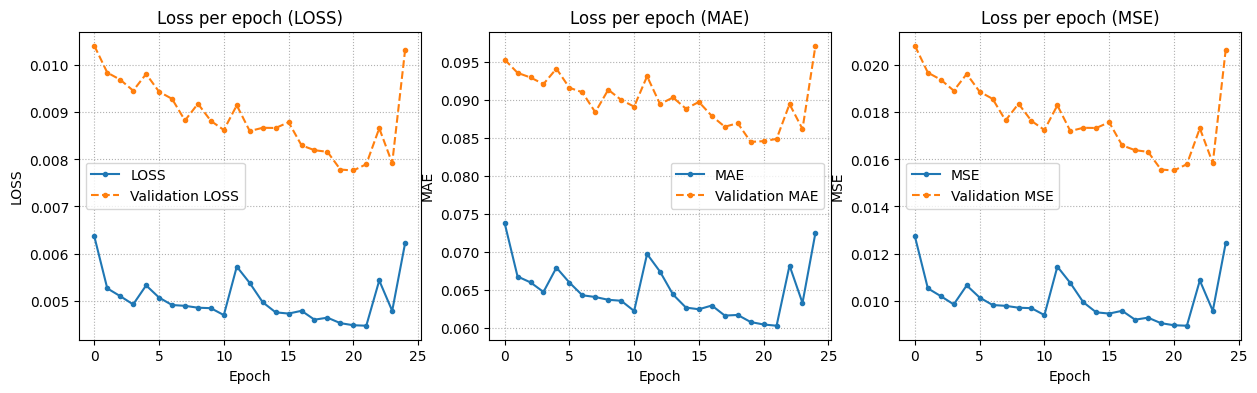

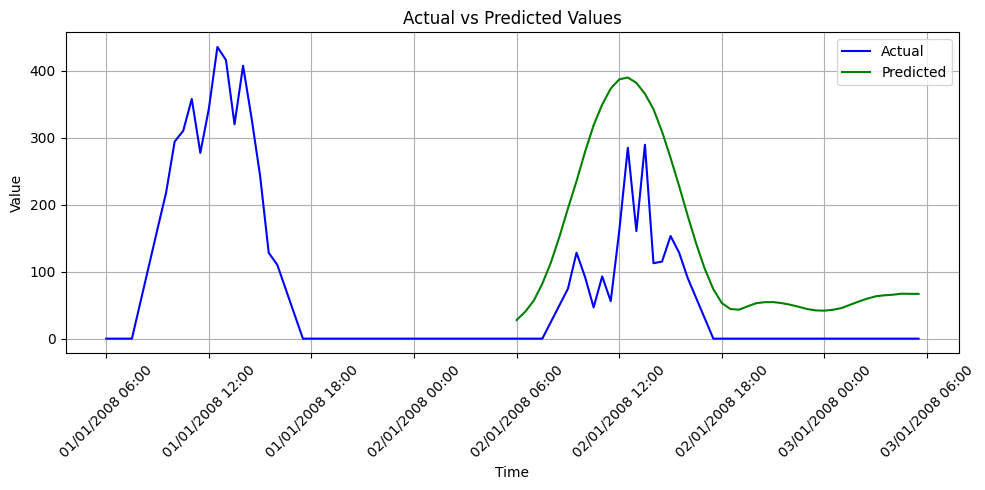

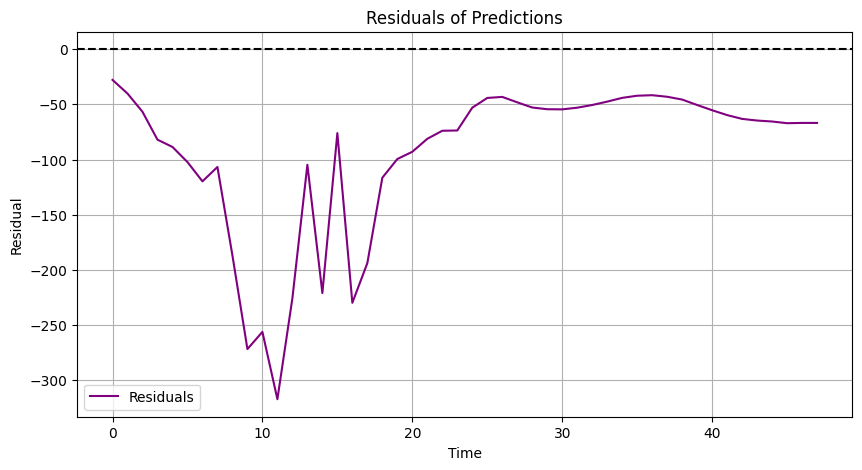

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
--Generated metrics for model: RNN_1_look48_overlap1
MSE = 94.338286
RMSE = 8899.712119
MAPE = 58.103914
sMAPE = 111.628654
MAE = 69.080622
Huber loss = 68.601105


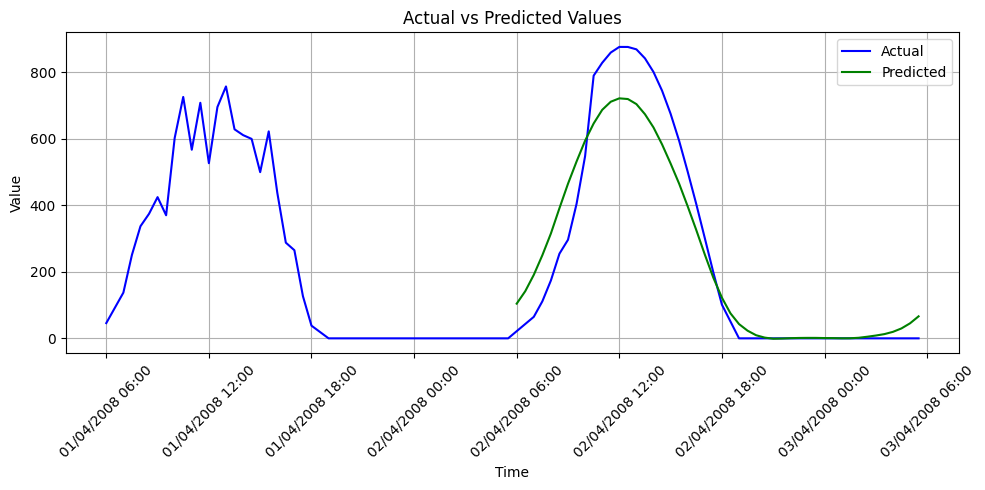

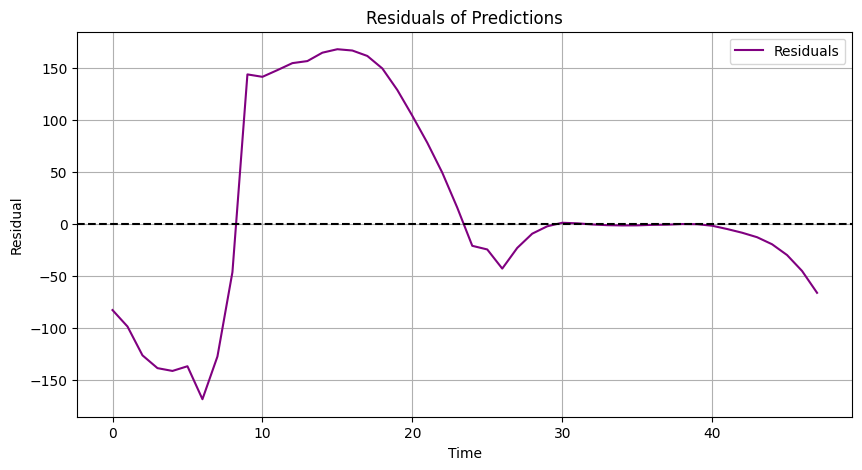

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
--Generated metrics for model: RNN_1_look48_overlap1
MSE = 125.393181
RMSE = 15723.449789
MAPE = 37.212894
sMAPE = 101.493252
MAE = 78.586271
Huber loss = 78.086266


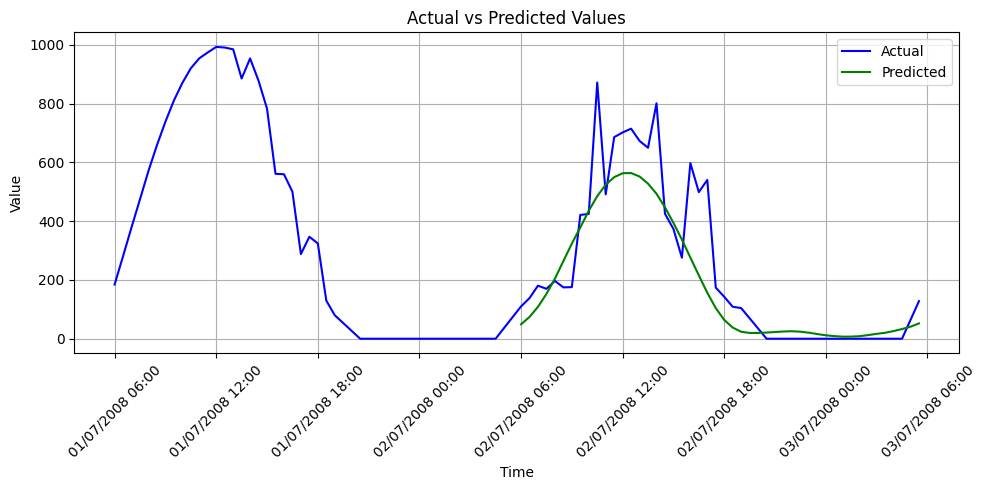

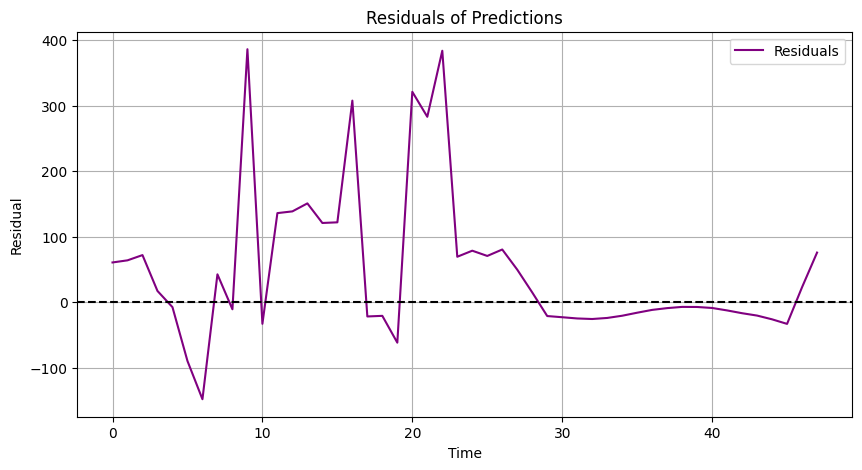

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
--Generated metrics for model: RNN_1_look48_overlap1
MSE = 190.239343
RMSE = 36191.007654
MAPE = 48.071595
sMAPE = 132.577653
MAE = 139.602054
Huber loss = 139.102051


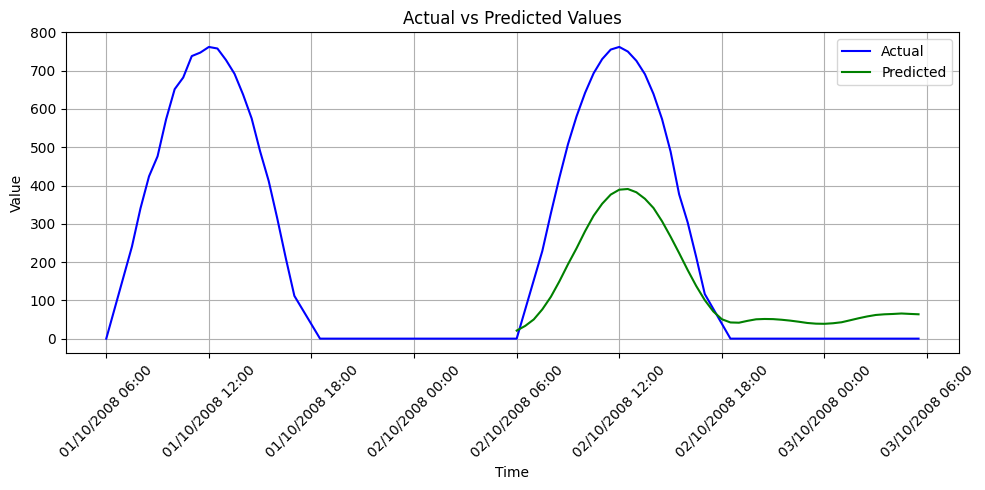

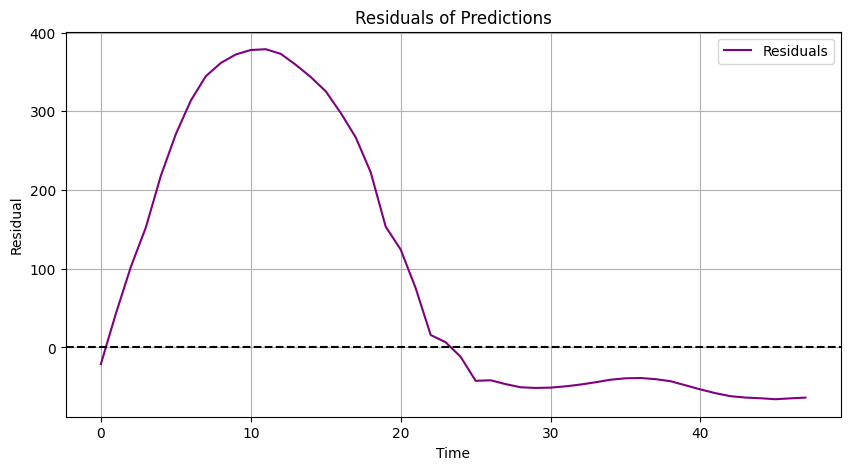

Scaler loaded using joblib from ./models/RNN_1_look72_overlap1_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look72_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
--Generated metrics for model: RNN_1_look72_overlap1
MSE = 244.657108
RMSE = 59857.100274
MAPE = 508.749924
sMAPE = 166.458368
MAE = 162.913444
Huber loss = 162.413452


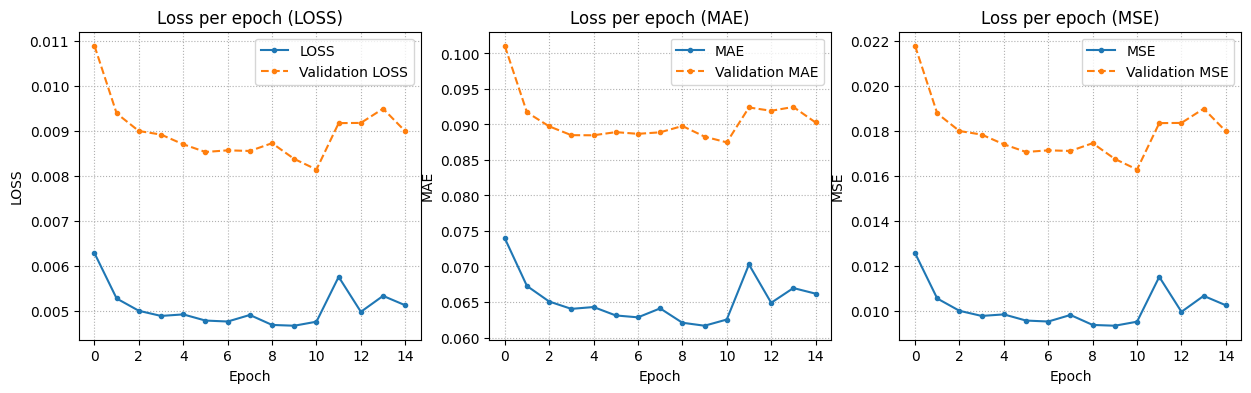

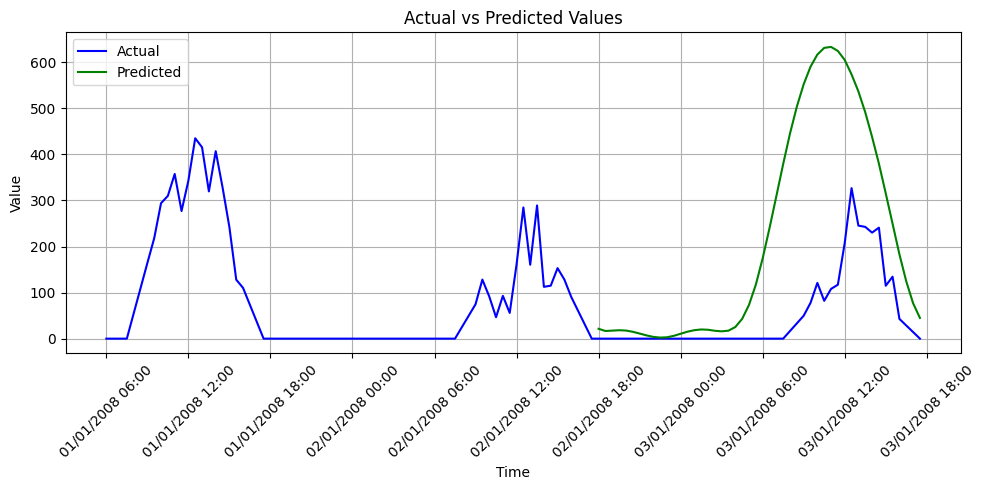

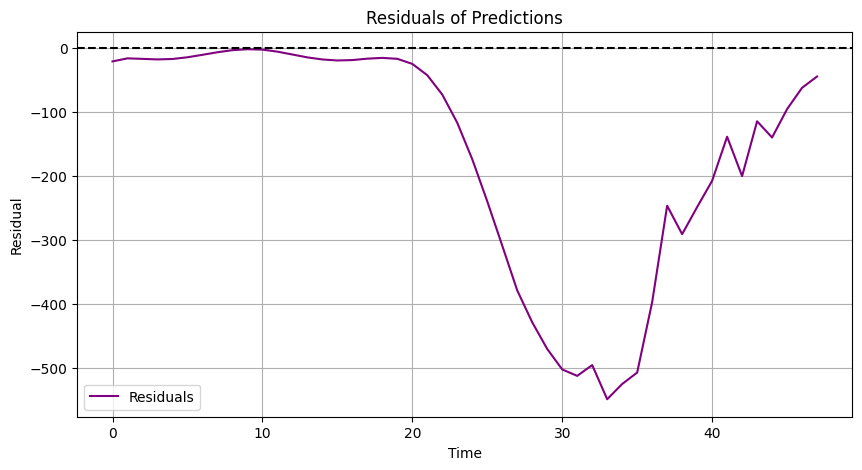

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
--Generated metrics for model: RNN_1_look72_overlap1
MSE = 110.311178
RMSE = 12168.555936
MAPE = 23.074646
sMAPE = 105.743355
MAE = 72.233890
Huber loss = 71.735542


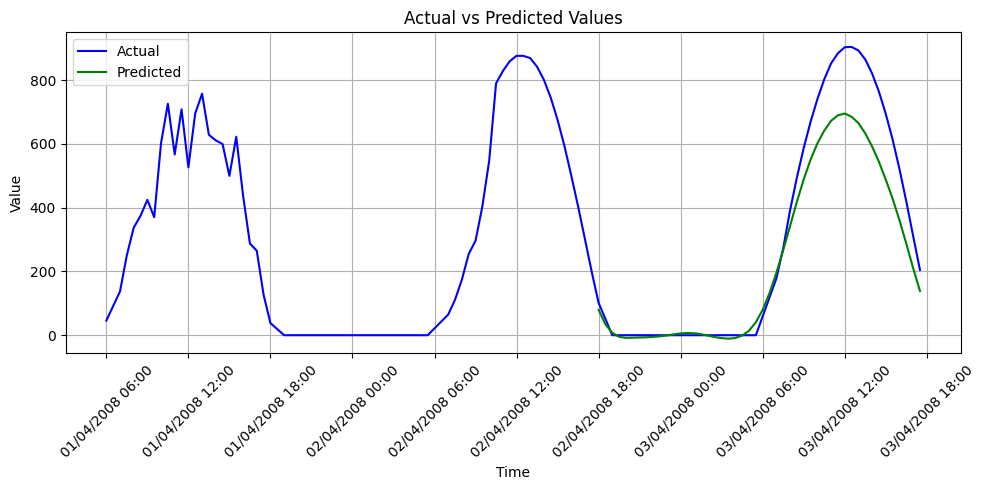

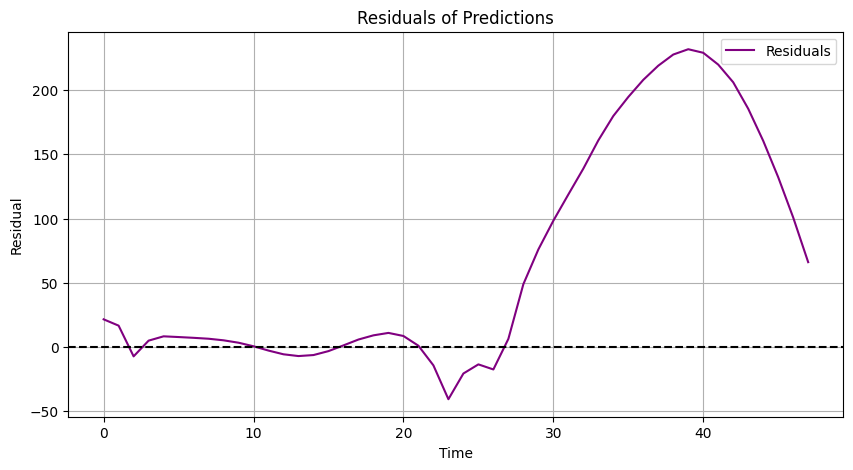

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
--Generated metrics for model: RNN_1_look72_overlap1
MSE = 206.108872
RMSE = 42480.867193
MAPE = 50.626493
sMAPE = 117.579939
MAE = 154.198829
Huber loss = 153.701965


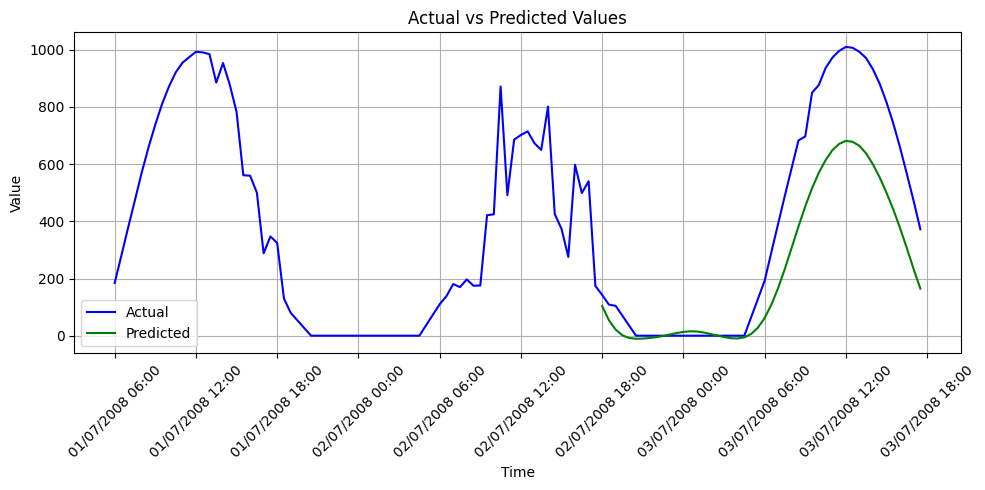

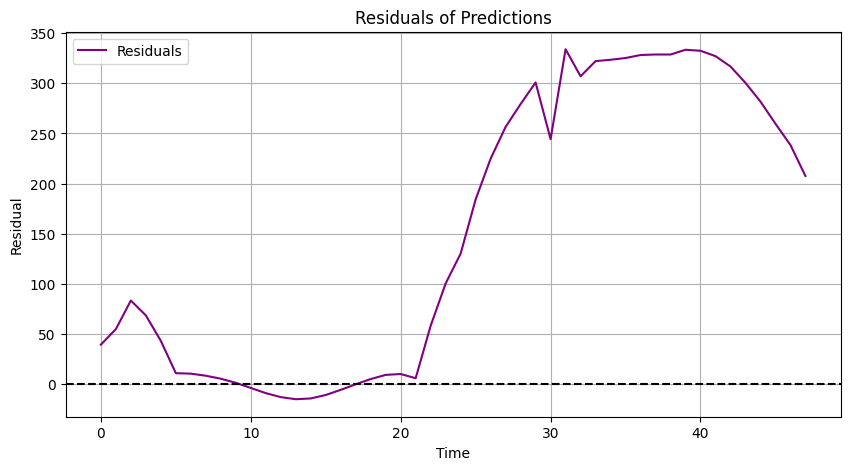

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
--Generated metrics for model: RNN_1_look72_overlap1
MSE = 92.135391
RMSE = 8488.930246
MAPE = 24.024097
sMAPE = 112.027537
MAE = 67.815072
Huber loss = 67.315071


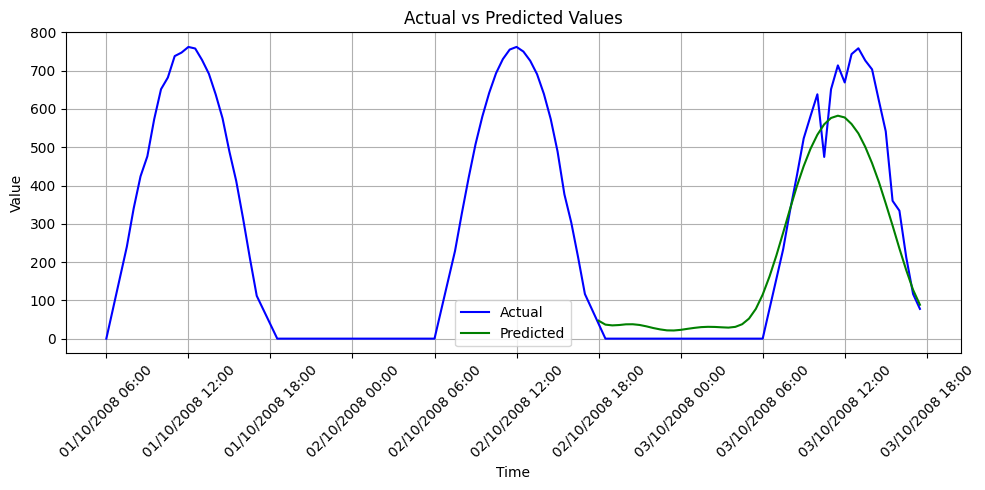

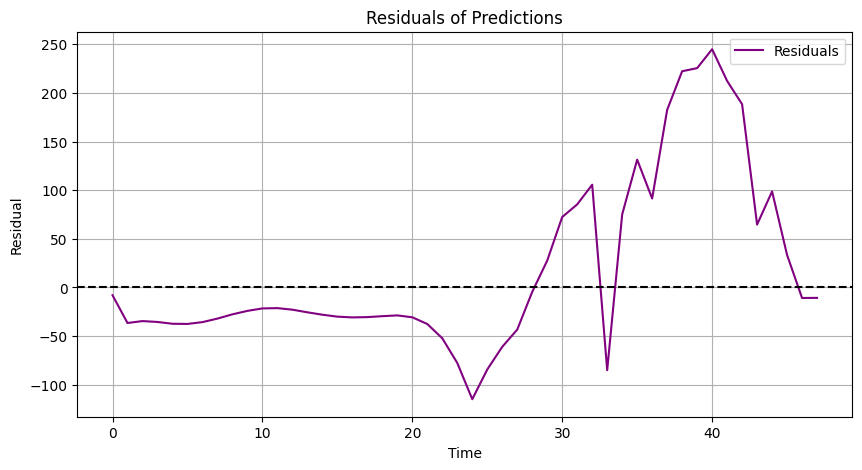

Scaler loaded using joblib from ./models/RNN_1_look96_overlap1_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look96_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
--Generated metrics for model: RNN_1_look96_overlap1
MSE = 79.510573
RMSE = 6321.931180
MAPE = 164.923743
sMAPE = 150.038572
MAE = 71.163244
Huber loss = 70.663246


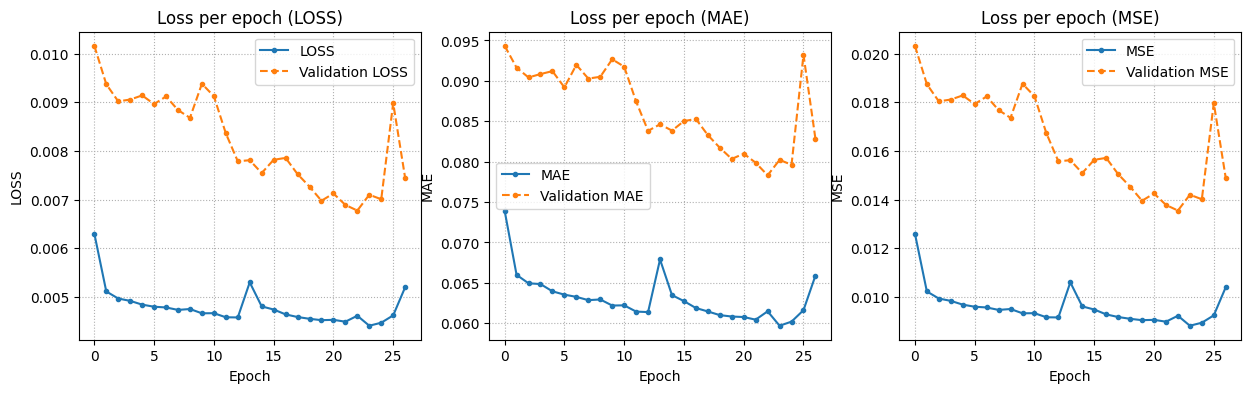

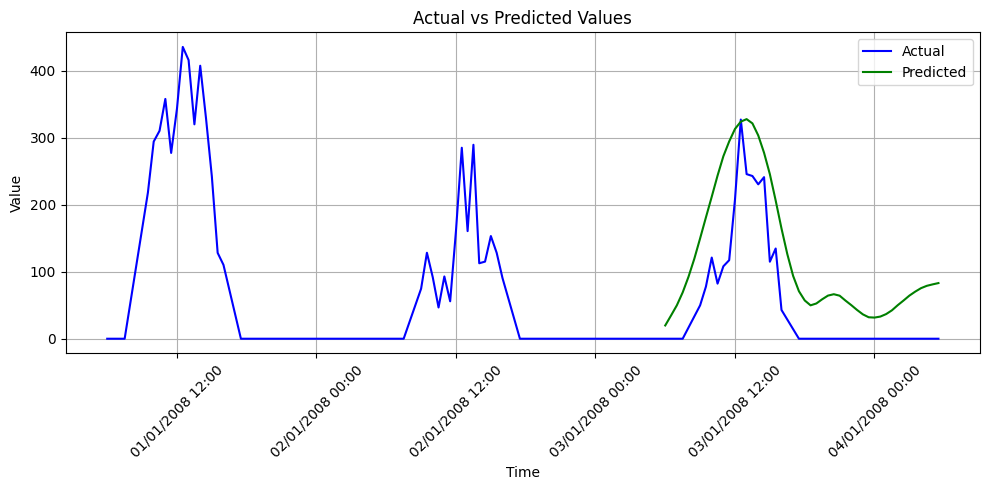

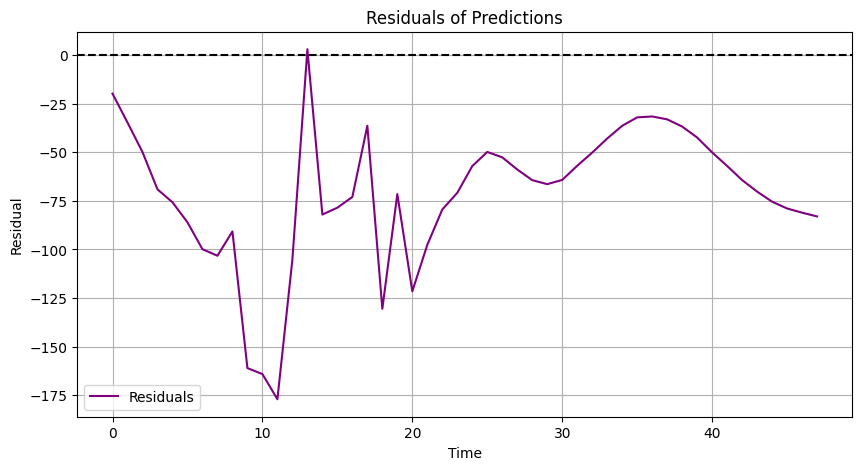

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
--Generated metrics for model: RNN_1_look96_overlap1
MSE = 115.524850
RMSE = 13345.990955
MAPE = 26.095778
sMAPE = 107.770687
MAE = 80.267708
Huber loss = 79.784035


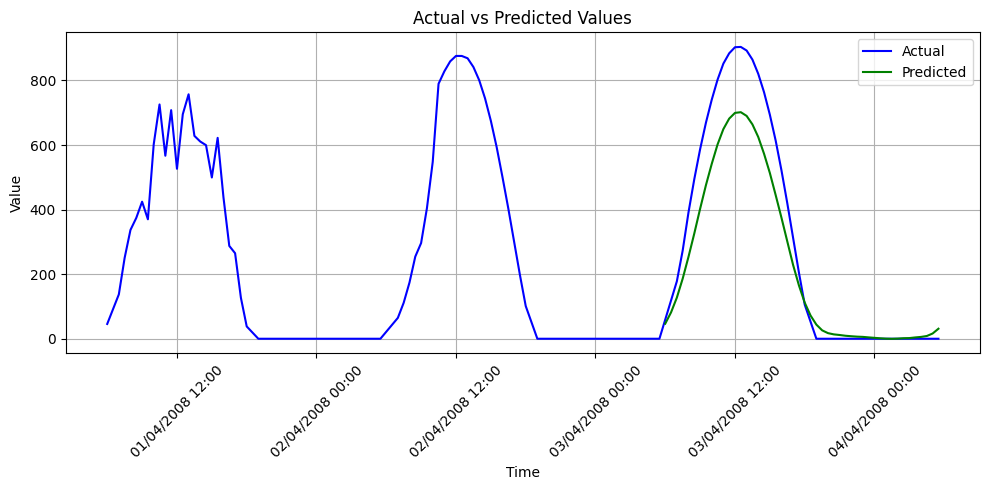

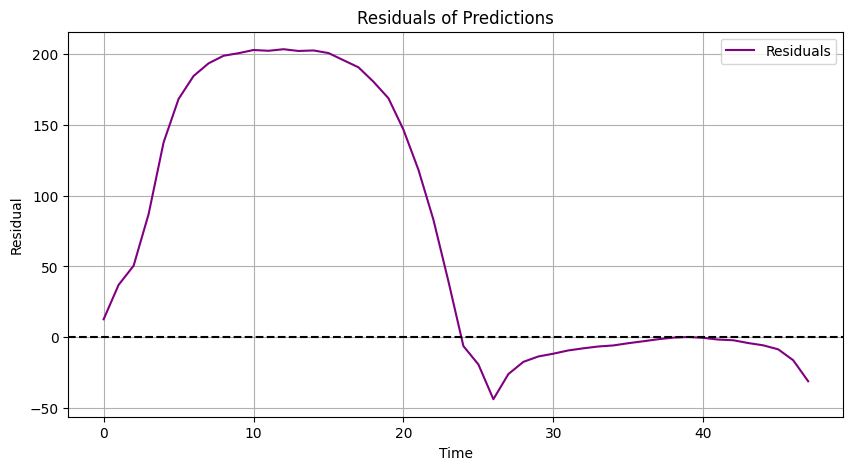

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
--Generated metrics for model: RNN_1_look96_overlap1
MSE = 190.310290
RMSE = 36218.006381
MAPE = 44.554676
sMAPE = 109.216108
MAE = 142.910159
Huber loss = 142.410385


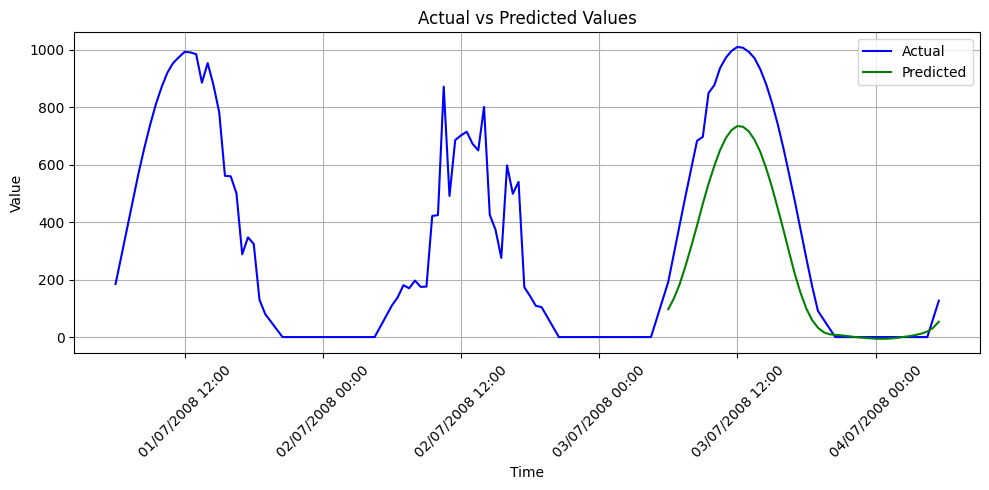

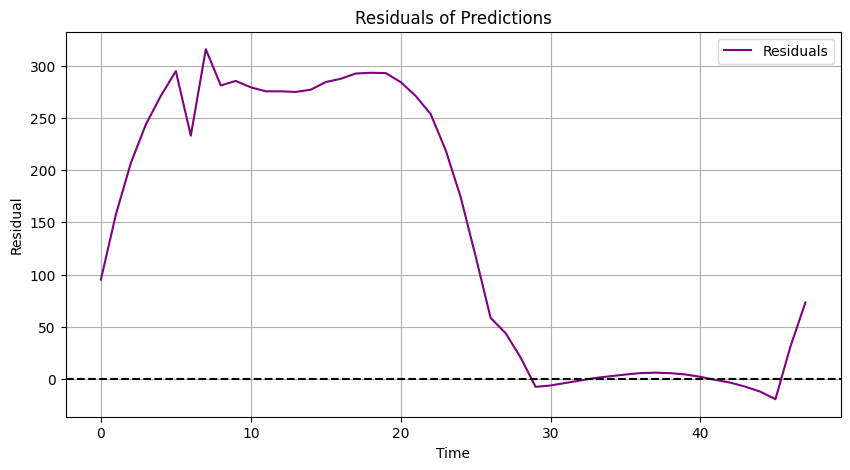

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
--Generated metrics for model: RNN_1_look96_overlap1
MSE = 123.308386
RMSE = 15204.957967
MAPE = 31.514745
sMAPE = 118.747260
MAE = 88.367061
Huber loss = 87.867065


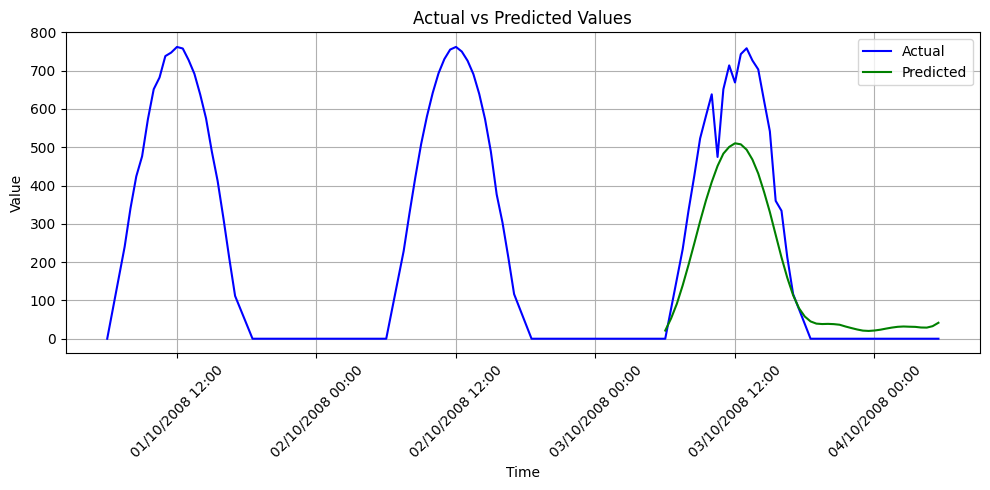

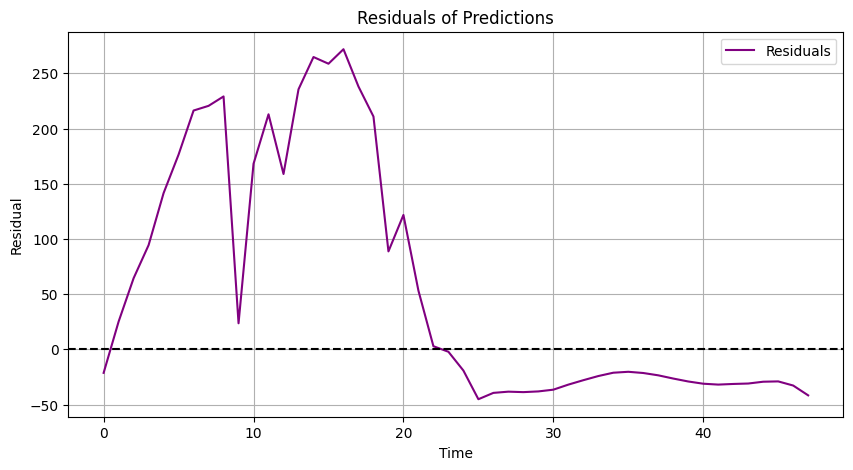

Scaler loaded using joblib from ./models/RNN_1_look48_overlap24_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look48_overlap24_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
--Generated metrics for model: RNN_1_look48_overlap24
MSE = 158.070594
RMSE = 24986.312783
MAPE = 144.971408
sMAPE = 161.264669
MAE = 119.297798
Huber loss = 118.801735


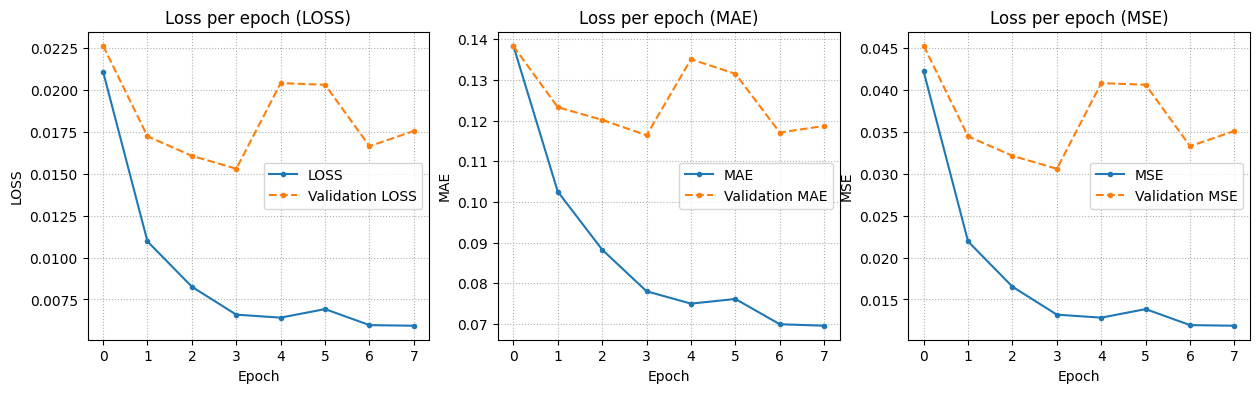

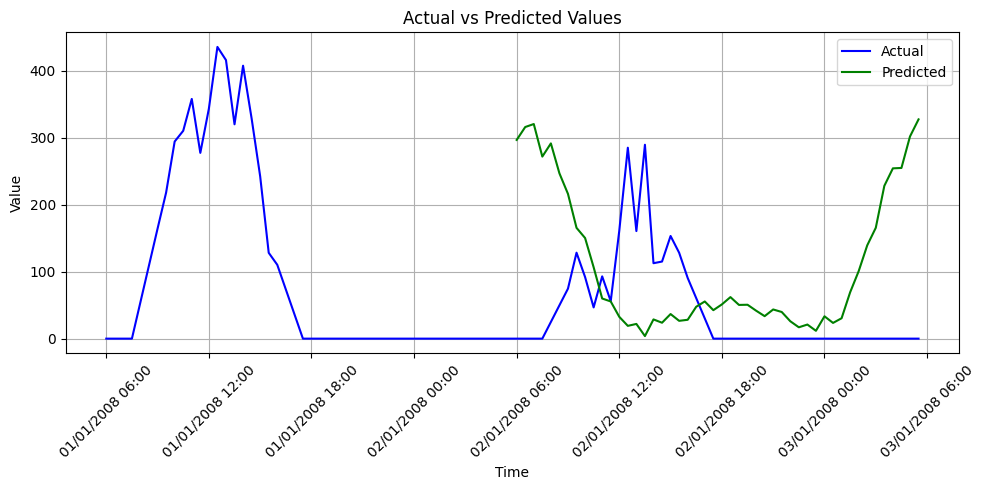

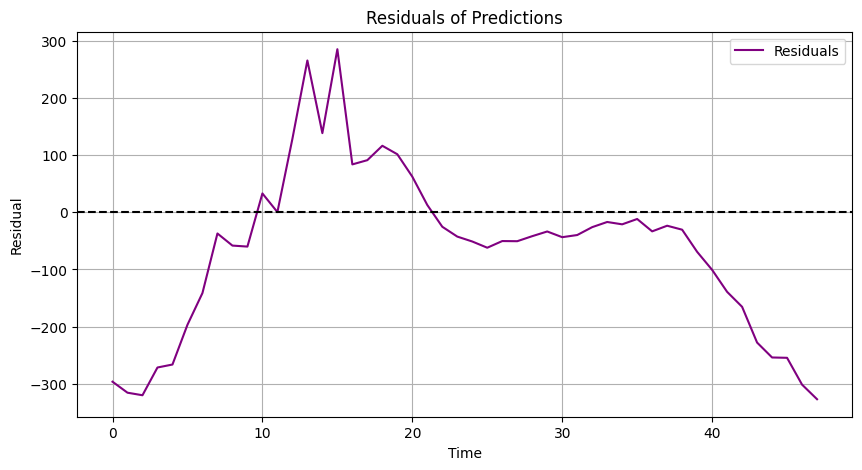

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
--Generated metrics for model: RNN_1_look48_overlap24
MSE = 405.706262
RMSE = 164597.570811
MAPE = 168.465619
sMAPE = 166.230298
MAE = 289.844404
Huber loss = 289.344391


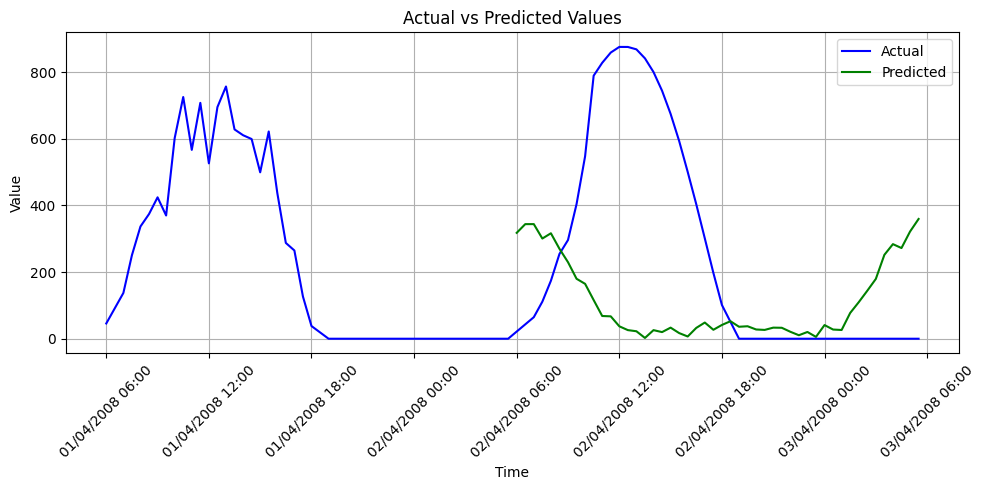

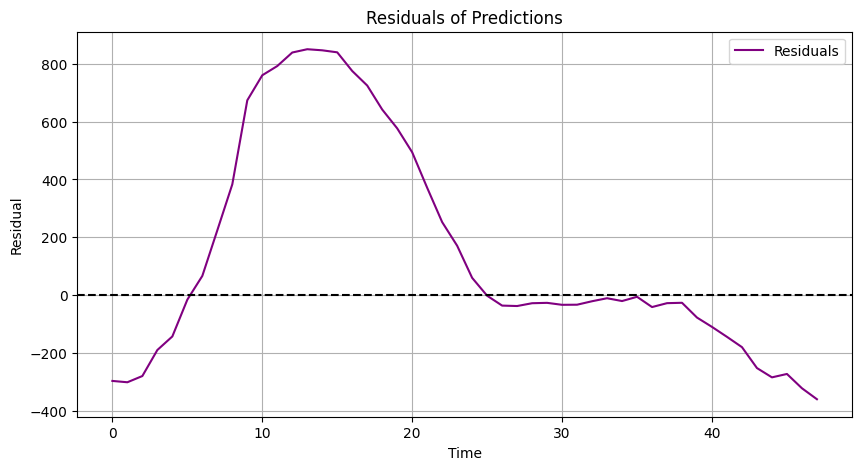

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
--Generated metrics for model: RNN_1_look48_overlap24
MSE = 340.131082
RMSE = 115689.153223
MAPE = 107.382828
sMAPE = 151.593038
MAE = 256.316689
Huber loss = 255.816696


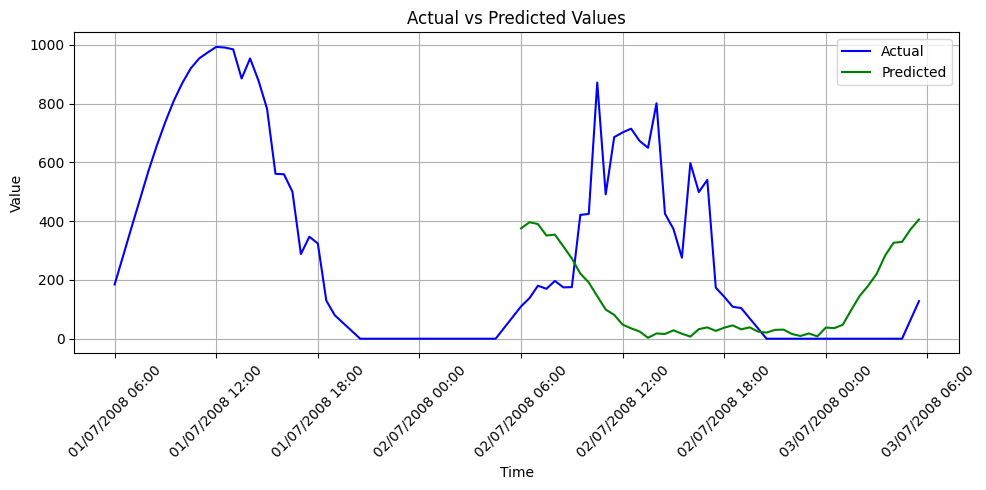

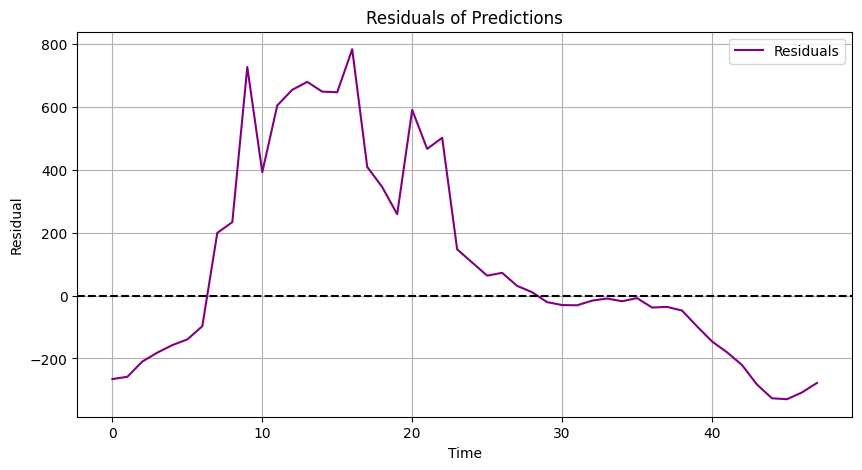

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
--Generated metrics for model: RNN_1_look48_overlap24
MSE = 343.715776
RMSE = 118140.534590
MAPE = 87.841512
sMAPE = 163.593213
MAE = 249.672076
Huber loss = 249.172073


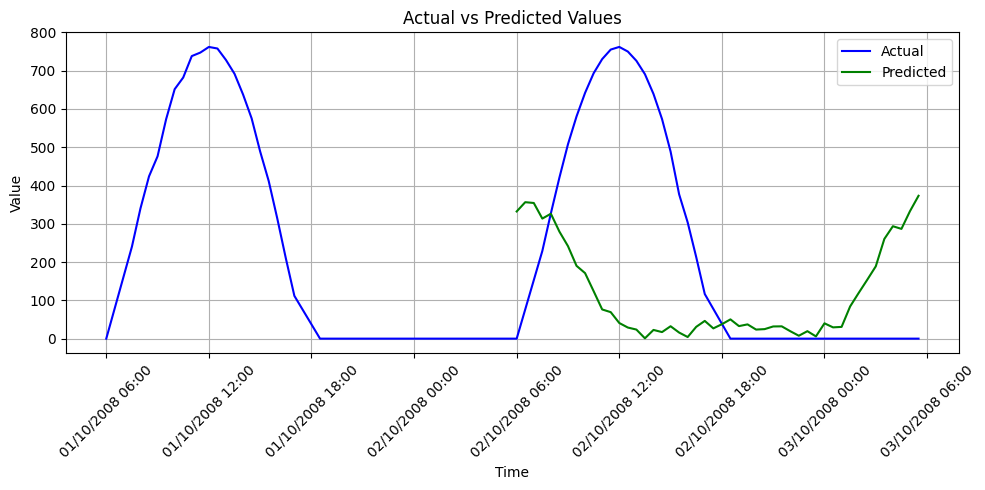

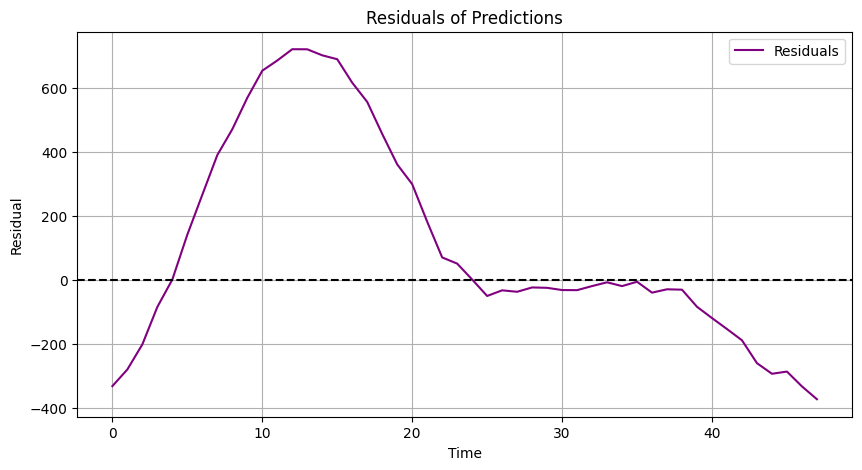

Scaler loaded using joblib from ./models/RNN_1_look72_overlap36_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look72_overlap36_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
--Generated metrics for model: RNN_1_look72_overlap36
MSE = 78.177088
RMSE = 6111.657051
MAPE = 179.884190
sMAPE = 148.476433
MAE = 67.742720
Huber loss = 67.244637


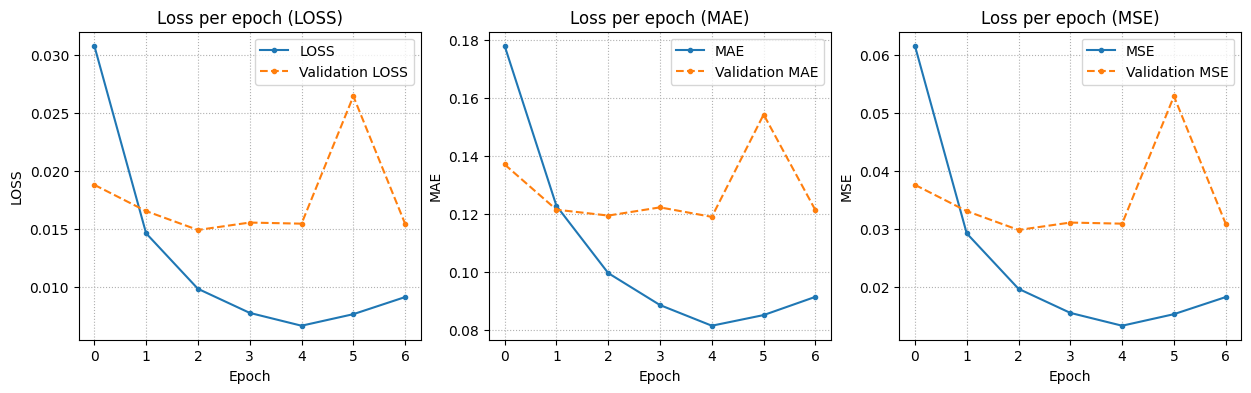

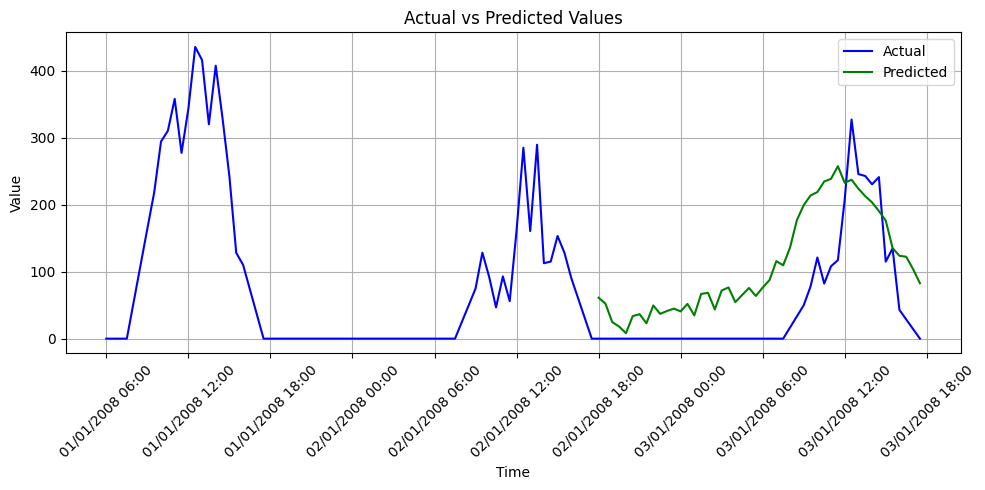

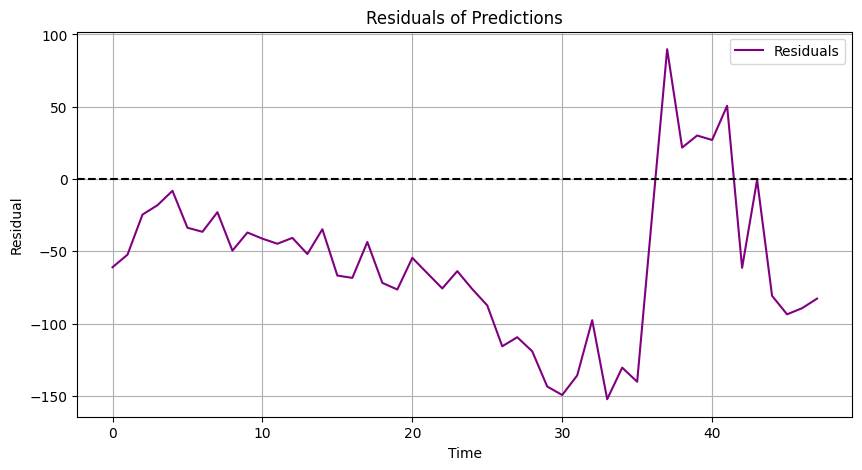

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
--Generated metrics for model: RNN_1_look72_overlap36
MSE = 175.575489
RMSE = 30826.752214
MAPE = 37.314098
sMAPE = 114.765919
MAE = 121.644791
Huber loss = 121.144798


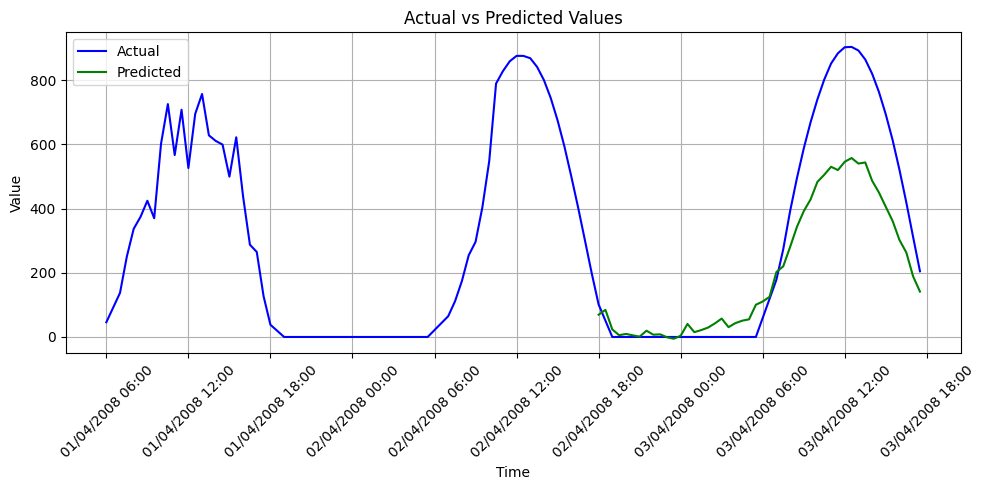

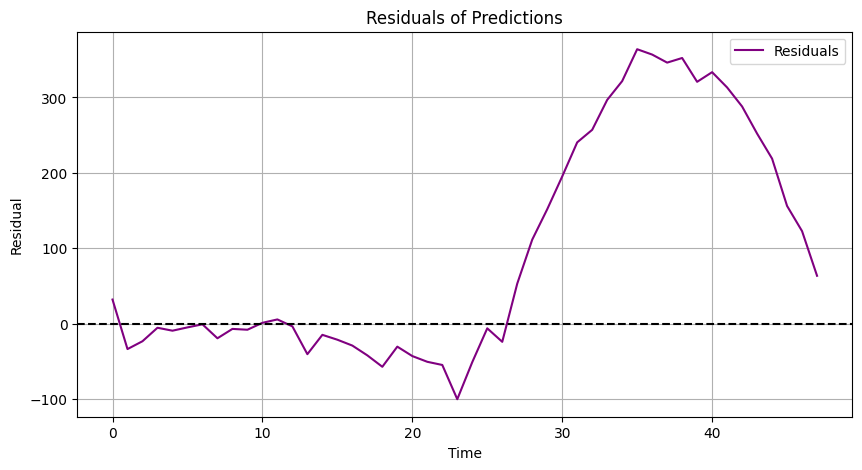

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
--Generated metrics for model: RNN_1_look72_overlap36
MSE = 280.869060
RMSE = 78887.428933
MAPE = 49.232052
sMAPE = 114.121336
MAE = 201.787979
Huber loss = 201.287979


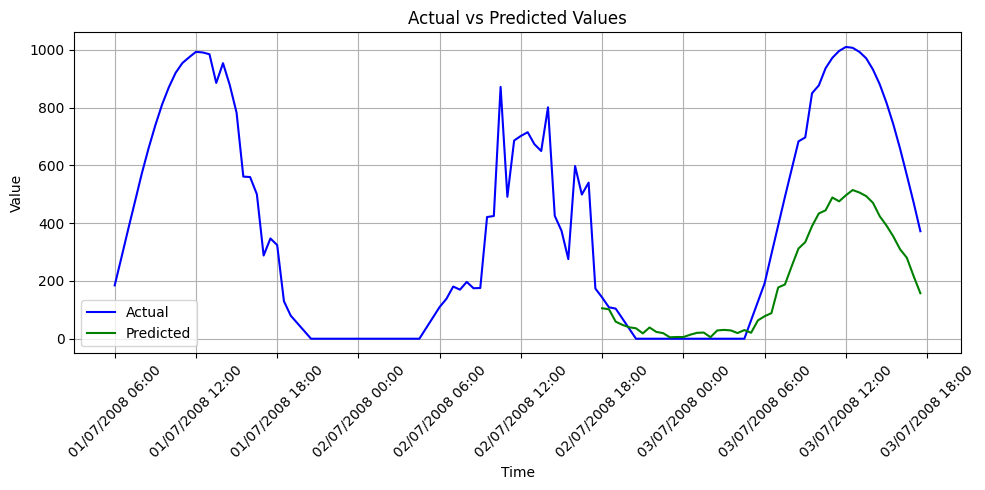

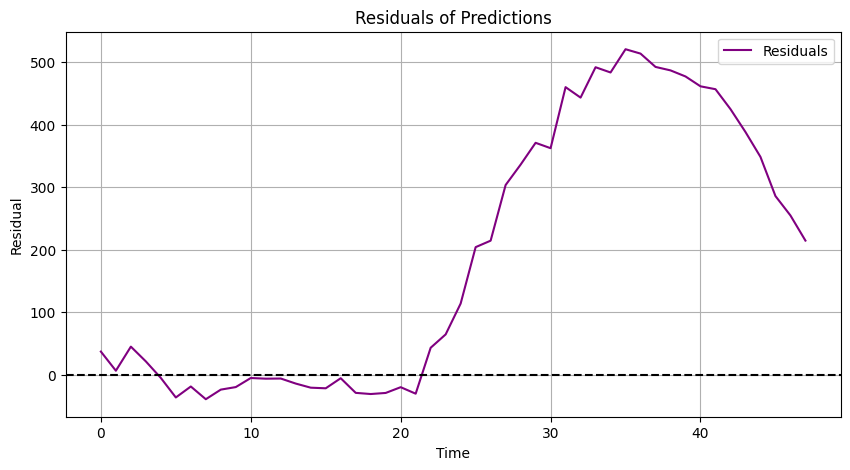

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
--Generated metrics for model: RNN_1_look72_overlap36
MSE = 158.887165
RMSE = 25245.131256
MAPE = 36.686569
sMAPE = 121.817500
MAE = 111.840821
Huber loss = 111.340973


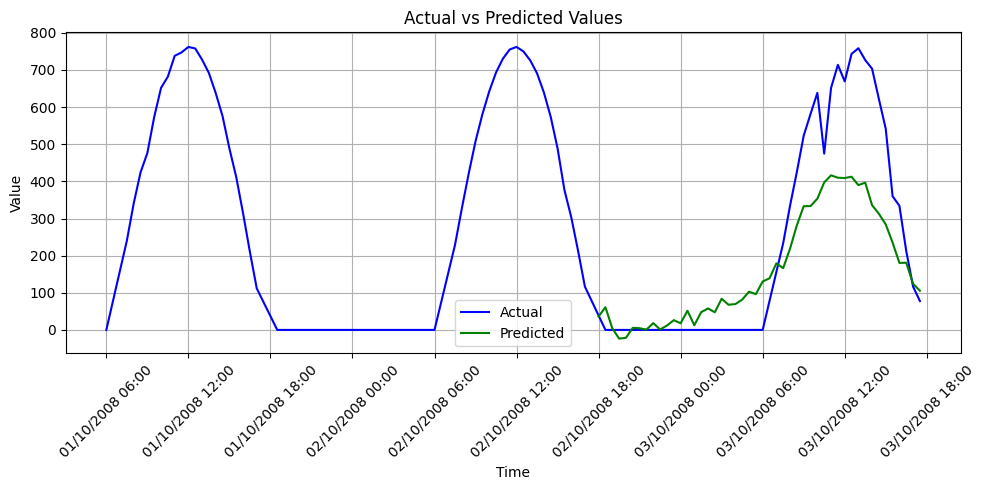

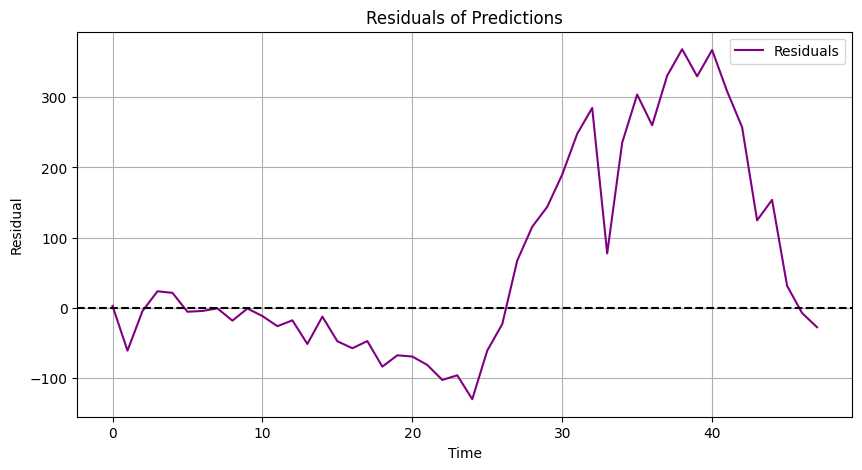

Scaler loaded using joblib from ./models/RNN_1_look96_overlap48_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look96_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
--Generated metrics for model: RNN_1_look96_overlap48
MSE = 147.245138
RMSE = 21681.130580
MAPE = 227.517716
sMAPE = 175.402880
MAE = 110.932641
Huber loss = 110.432640


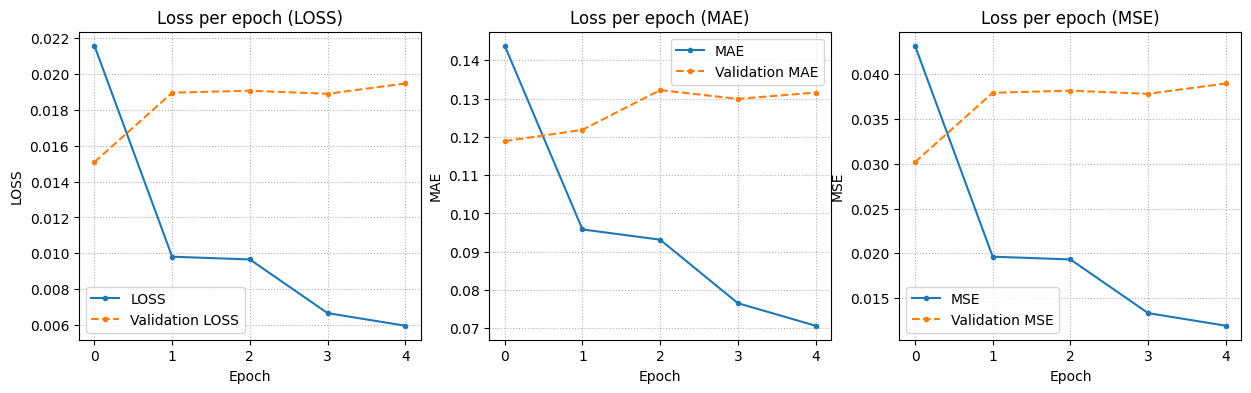

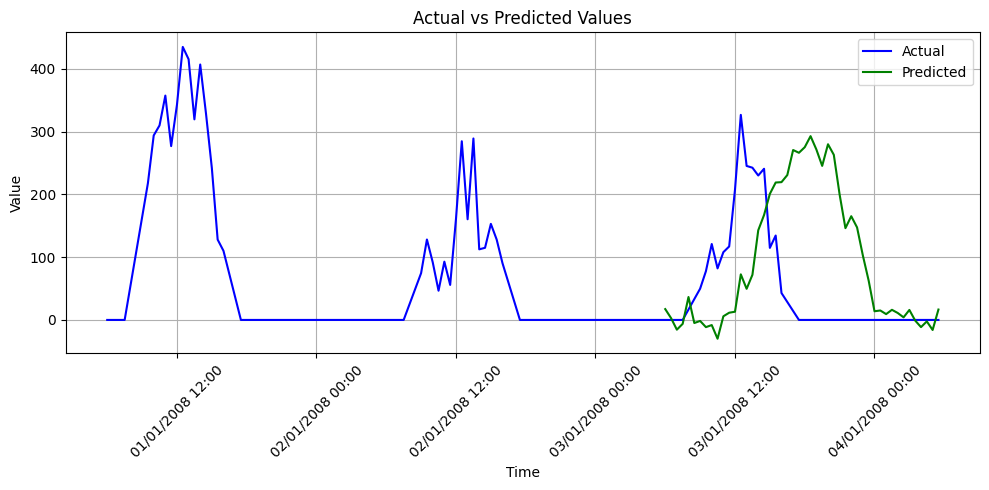

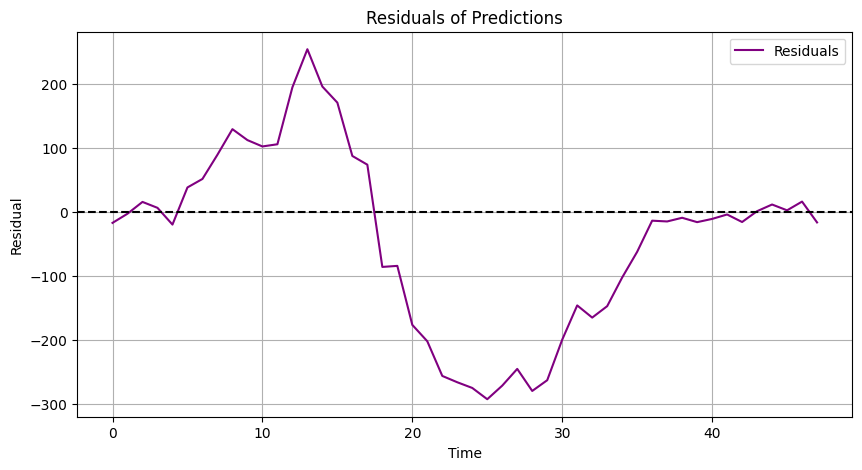

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
--Generated metrics for model: RNN_1_look96_overlap48
MSE = 425.922660
RMSE = 181410.112701
MAPE = 101.796912
sMAPE = 171.007962
MAE = 304.804667
Huber loss = 304.314362


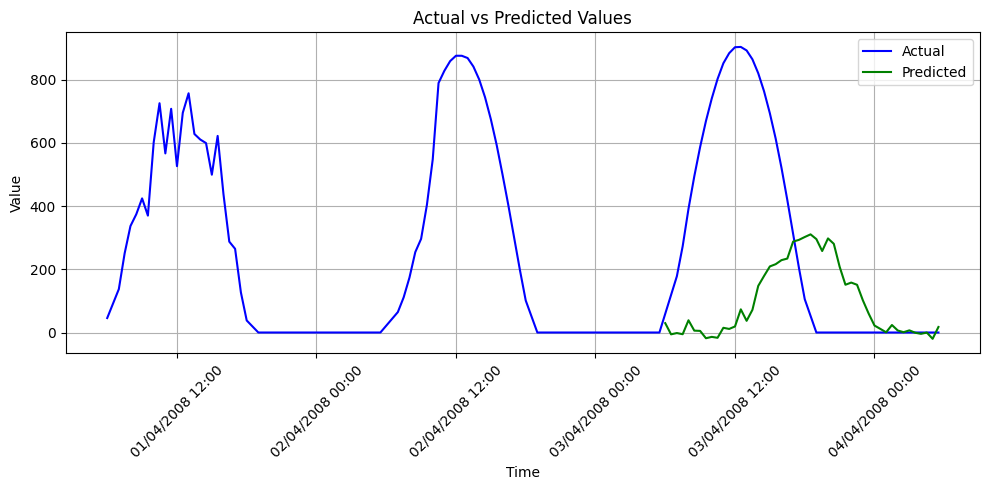

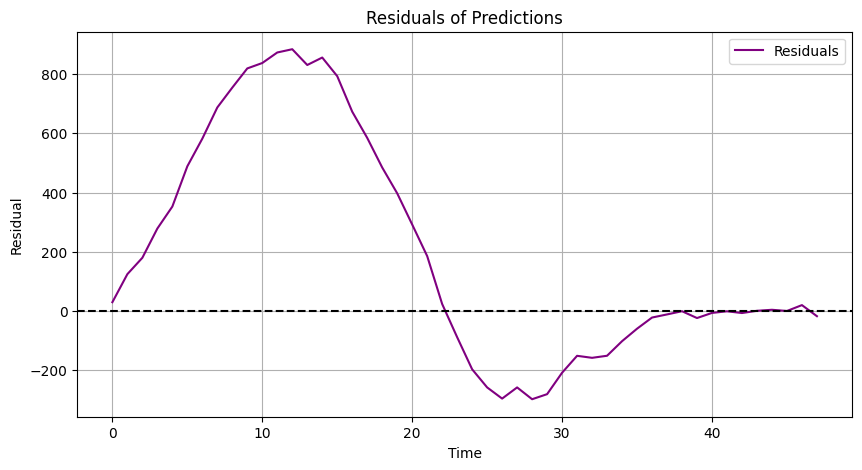

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
--Generated metrics for model: RNN_1_look96_overlap48
MSE = 499.357669
RMSE = 249358.081504
MAPE = 132.498216
sMAPE = 166.101629
MAE = 368.758557
Huber loss = 368.258545


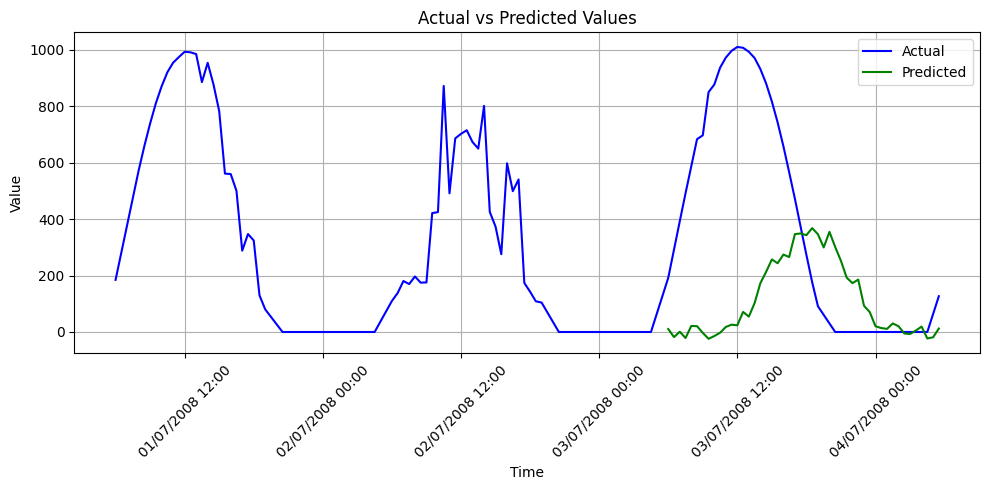

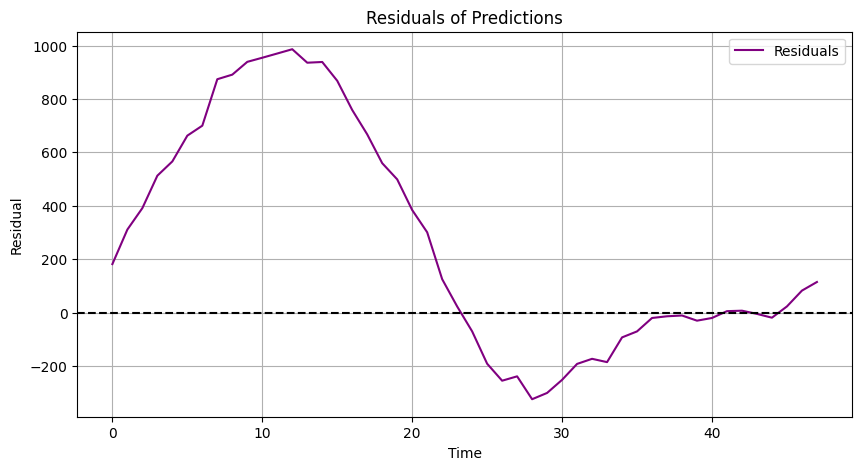

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
--Generated metrics for model: RNN_1_look96_overlap48
MSE = 339.492285
RMSE = 115255.011790
MAPE = 115.575822
sMAPE = 174.795975
MAE = 249.266775
Huber loss = 248.766769


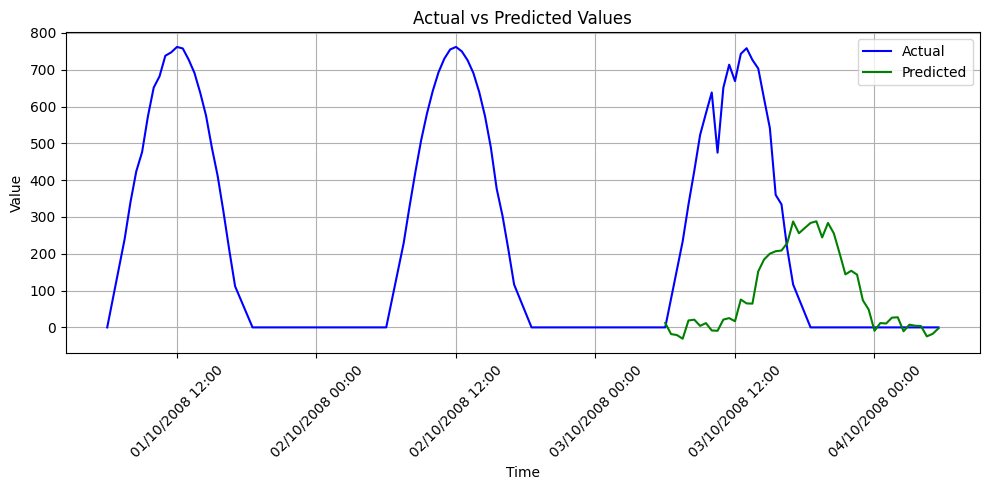

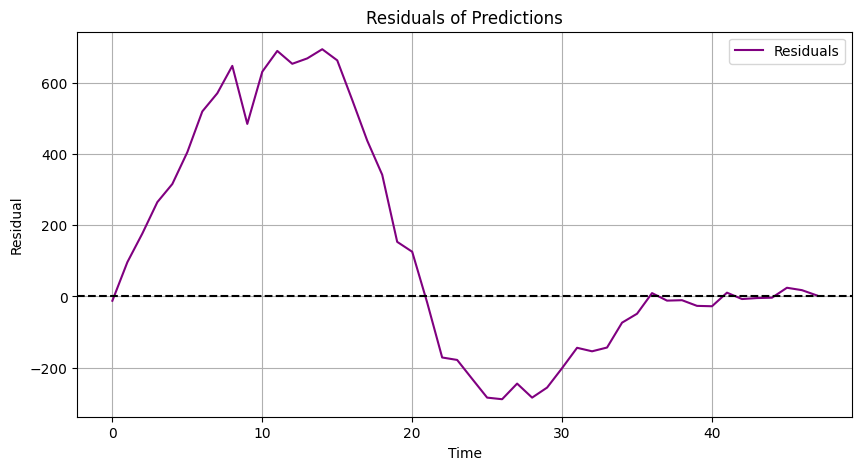

Scaler loaded using joblib from ./models/RNN_1_look48_overlap48_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look48_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
--Generated metrics for model: RNN_1_look48_overlap48
MSE = 117.172815
RMSE = 13729.468462
MAPE = 96.792537
sMAPE = 159.824146
MAE = 84.426070
Huber loss = 83.933052


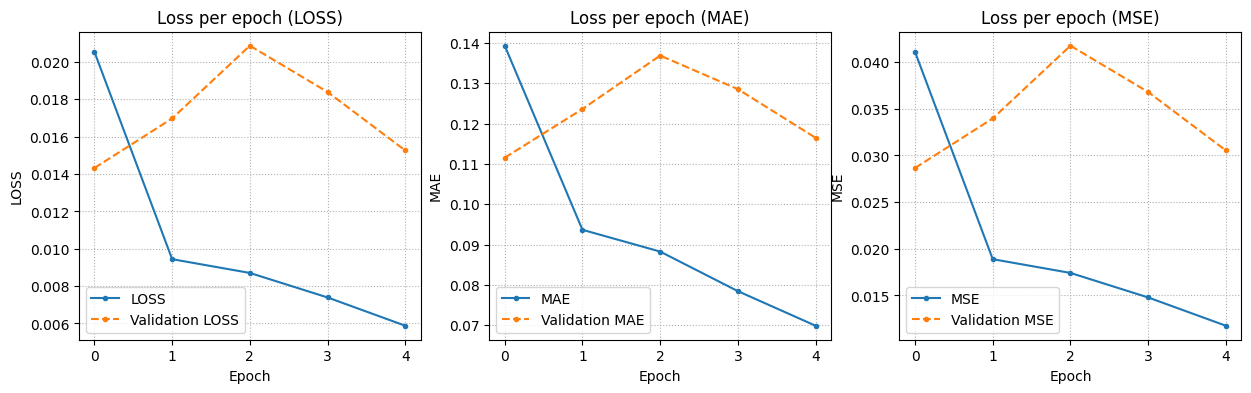

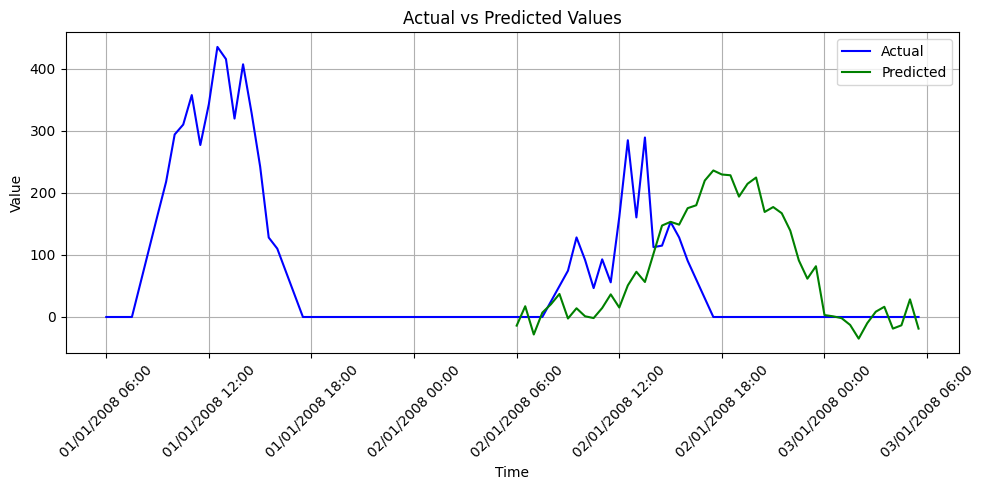

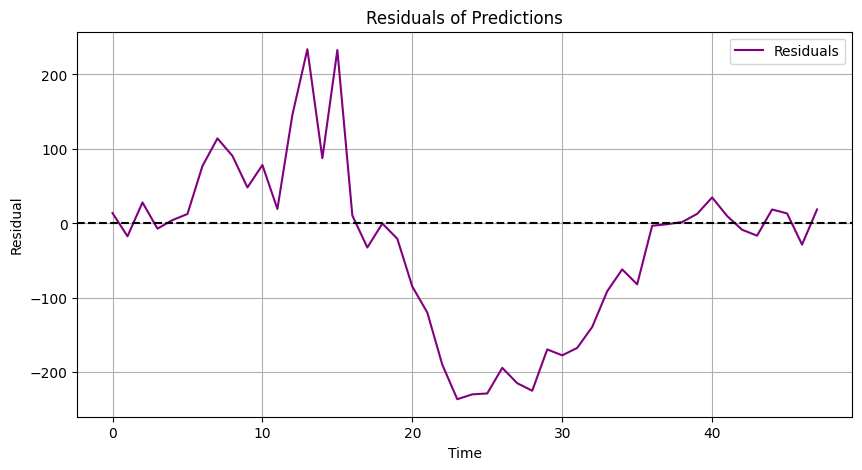

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
--Generated metrics for model: RNN_1_look48_overlap48
MSE = 384.651048
RMSE = 147956.428388
MAPE = 100.565929
sMAPE = 172.014206
MAE = 261.344393
Huber loss = 260.852875


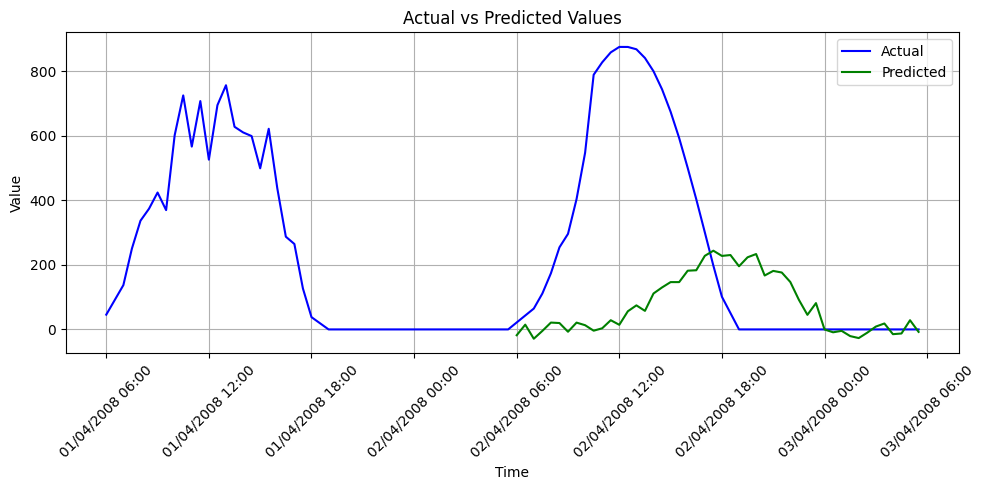

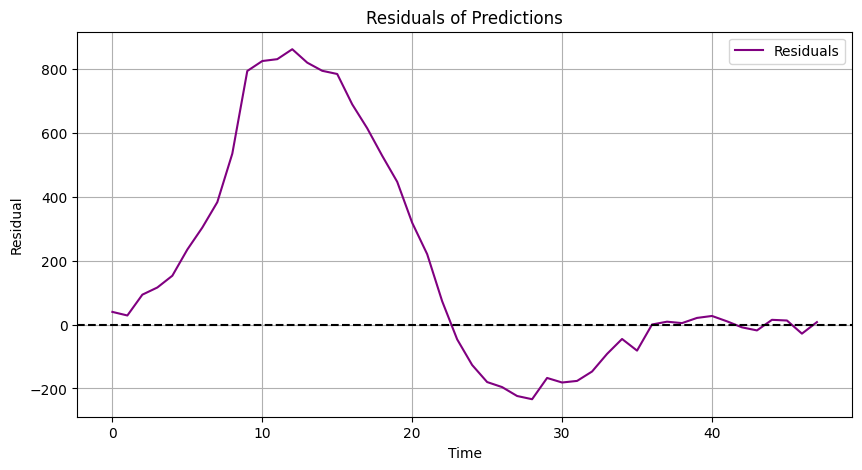

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
--Generated metrics for model: RNN_1_look48_overlap48
MSE = 317.540082
RMSE = 100831.703570
MAPE = 103.825541
sMAPE = 161.256513
MAE = 224.502132
Huber loss = 224.002136


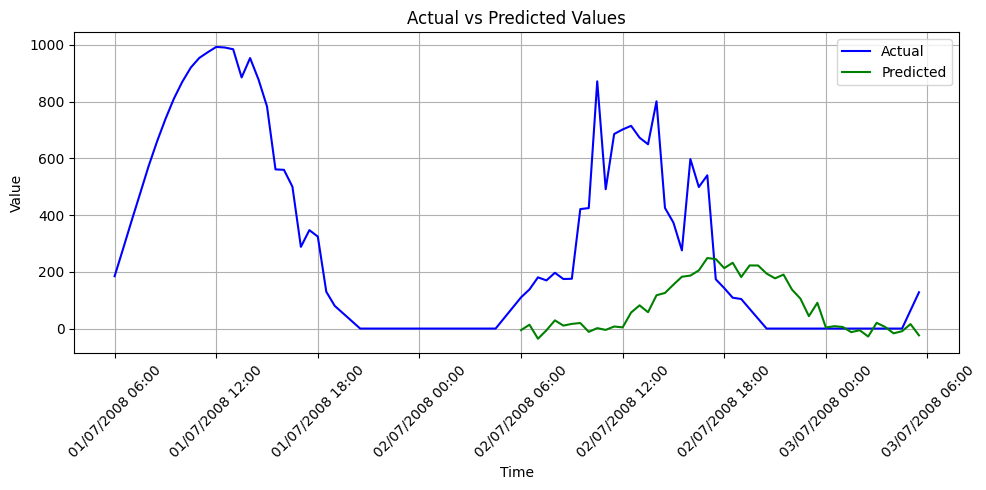

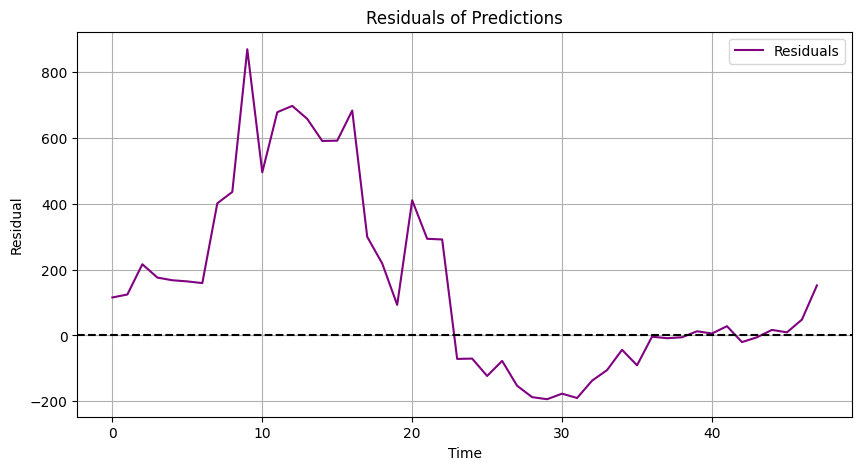

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
--Generated metrics for model: RNN_1_look48_overlap48
MSE = 348.537624
RMSE = 121478.475195
MAPE = 107.076434
sMAPE = 175.245595
MAE = 246.494260
Huber loss = 245.996719


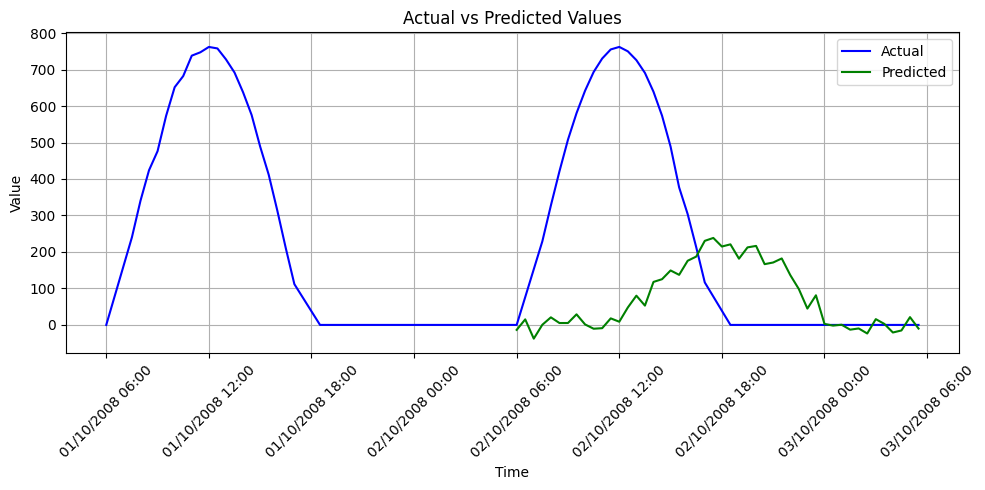

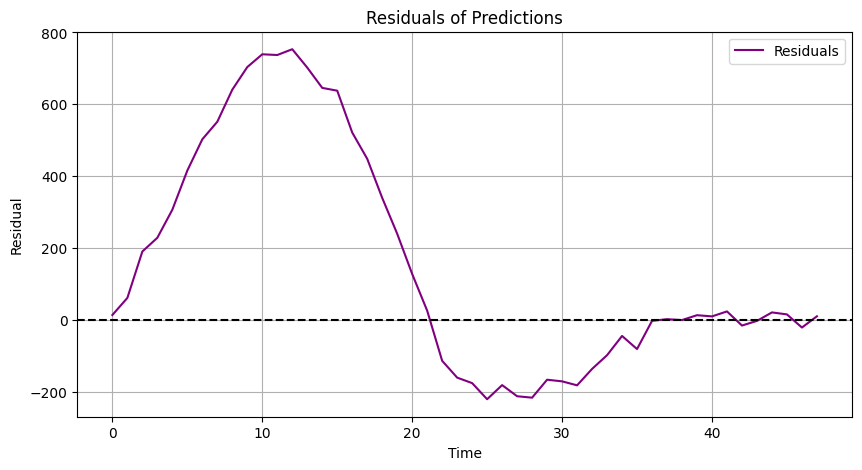

Scaler loaded using joblib from ./models/RNN_1_look72_overlap72_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look72_overlap72_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
--Generated metrics for model: RNN_1_look72_overlap72
MSE = 178.632548
RMSE = 31909.587204
MAPE = 213.578746
sMAPE = 166.589655
MAE = 136.836671
Huber loss = 136.336670


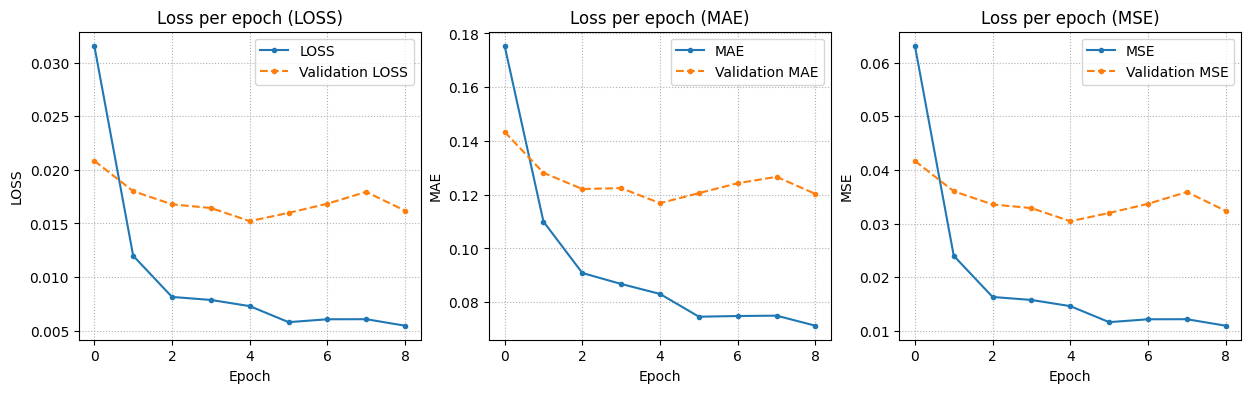

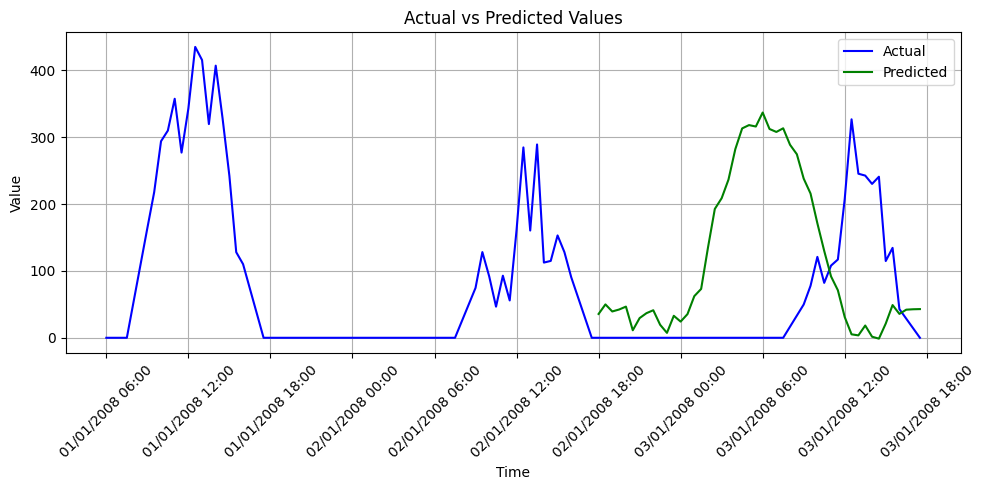

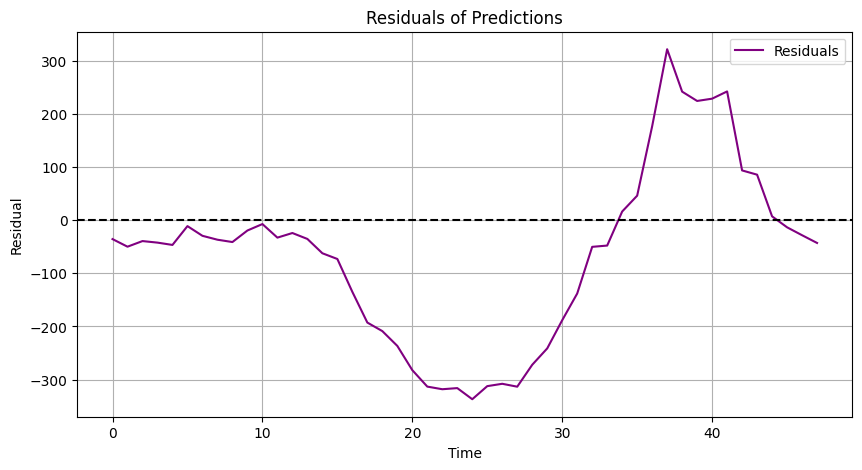

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
--Generated metrics for model: RNN_1_look72_overlap72
MSE = 406.768803
RMSE = 165460.859307
MAPE = 94.066656
sMAPE = 153.583733
MAE = 304.787062
Huber loss = 304.287079


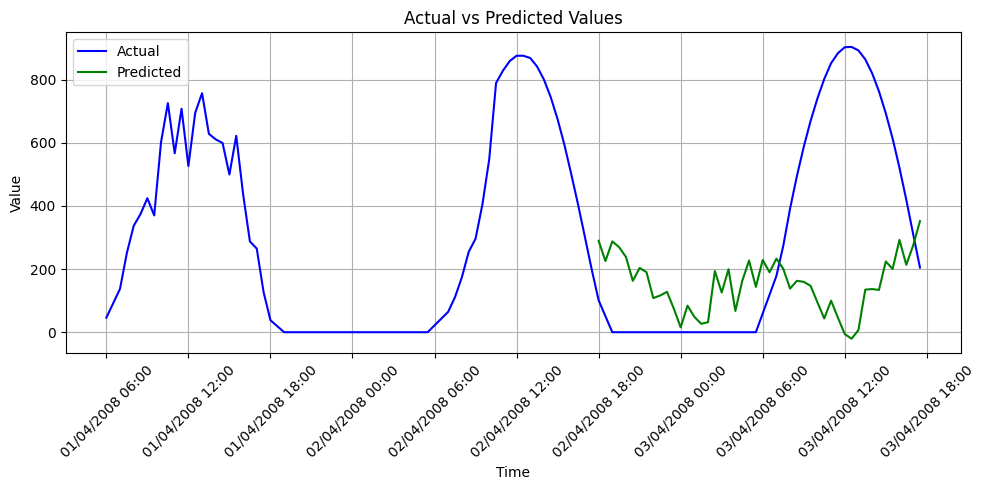

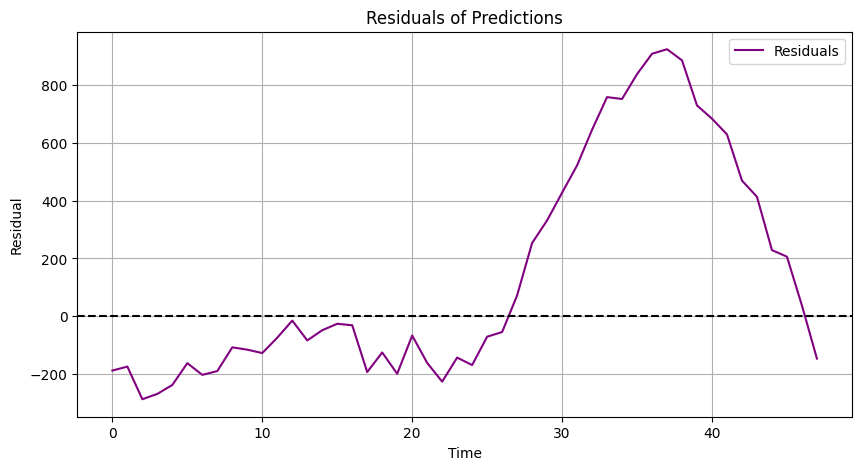

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
--Generated metrics for model: RNN_1_look72_overlap72
MSE = 472.745609
RMSE = 223488.411242
MAPE = 98.779801
sMAPE = 142.204913
MAE = 349.245567
Huber loss = 348.745605


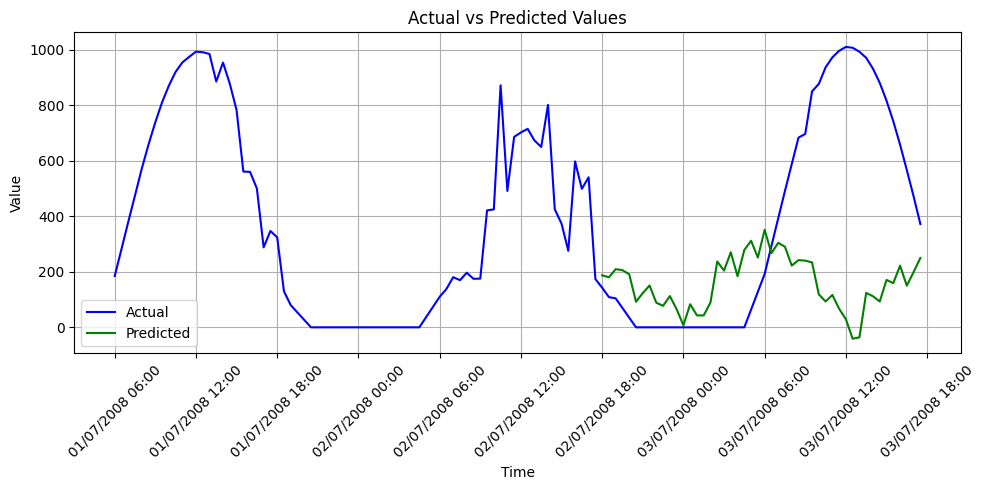

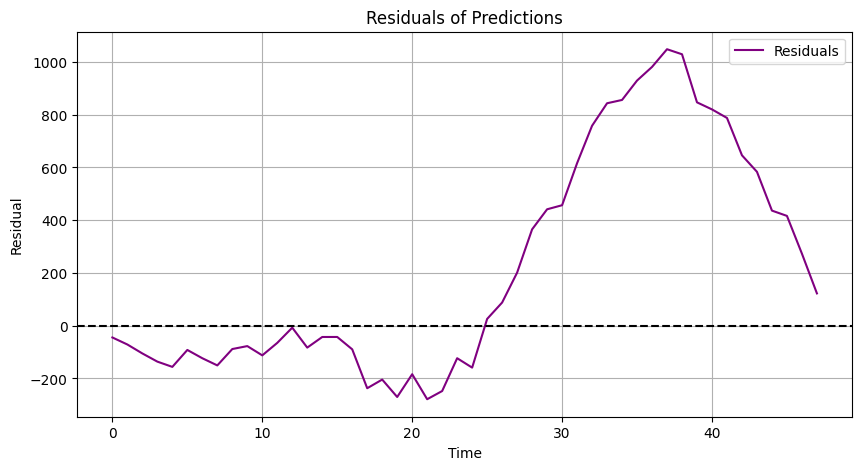

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
--Generated metrics for model: RNN_1_look72_overlap72
MSE = 348.660253
RMSE = 121563.972358
MAPE = 90.906903
sMAPE = 153.849156
MAE = 267.061714
Huber loss = 266.561737


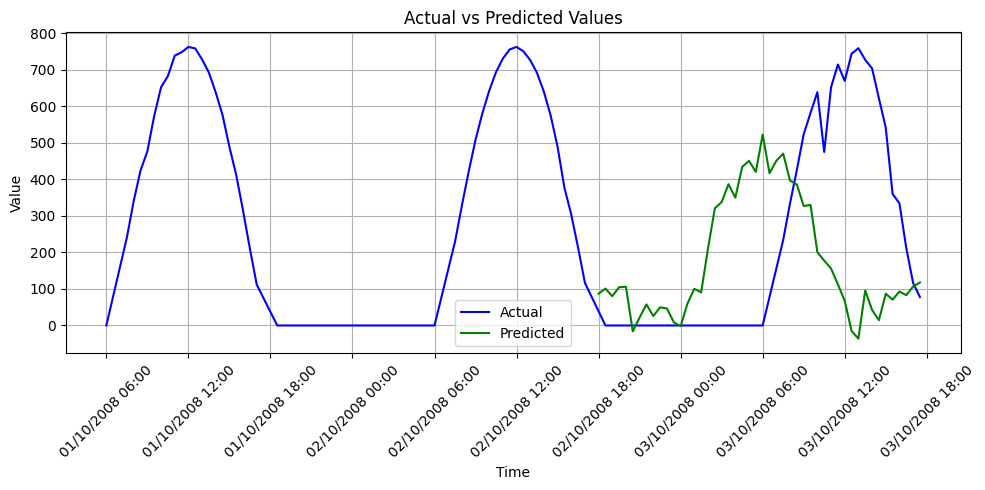

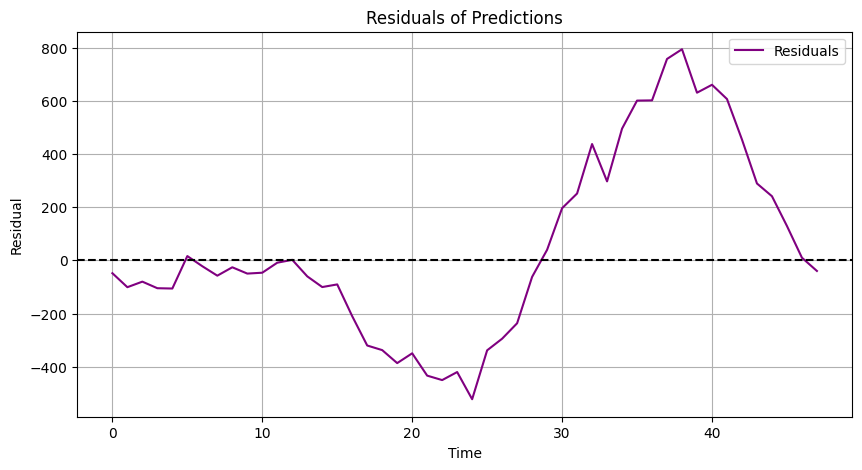

Scaler loaded using joblib from ./models/RNN_1_look96_overlap96_scaler_x.pkl
Scaler loaded using joblib from ./models/RNN_1_look96_overlap96_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
--Generated metrics for model: RNN_1_look96_overlap96
MSE = 153.314684
RMSE = 23505.392426
MAPE = 233.116097
sMAPE = 172.410582
MAE = 117.448953
Huber loss = 116.950050


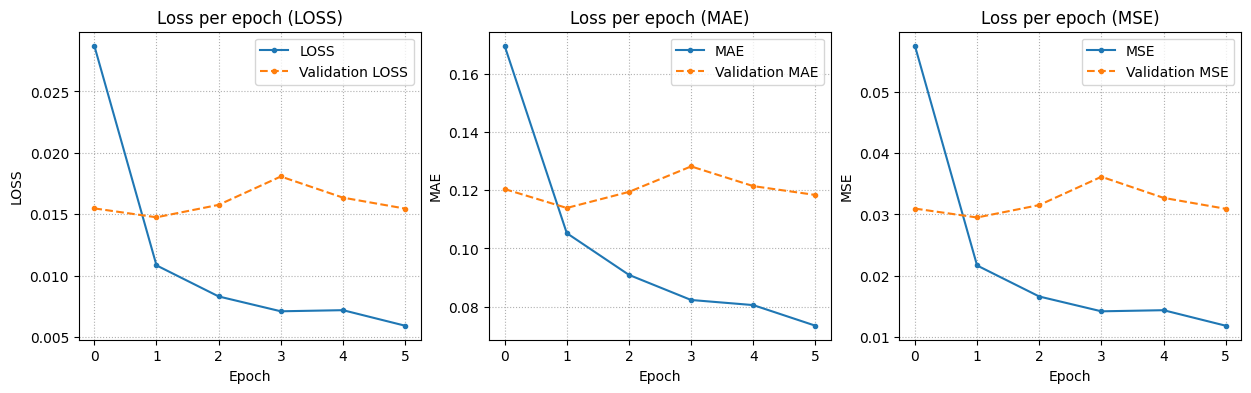

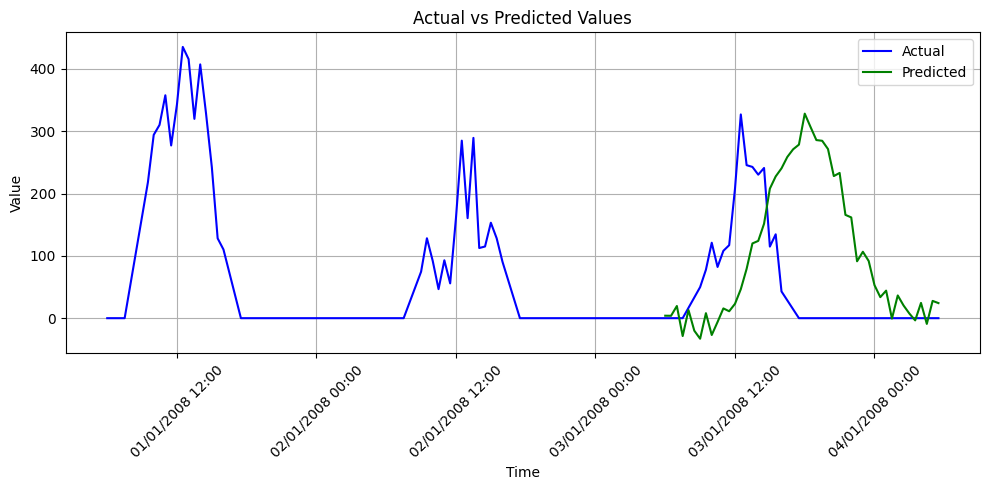

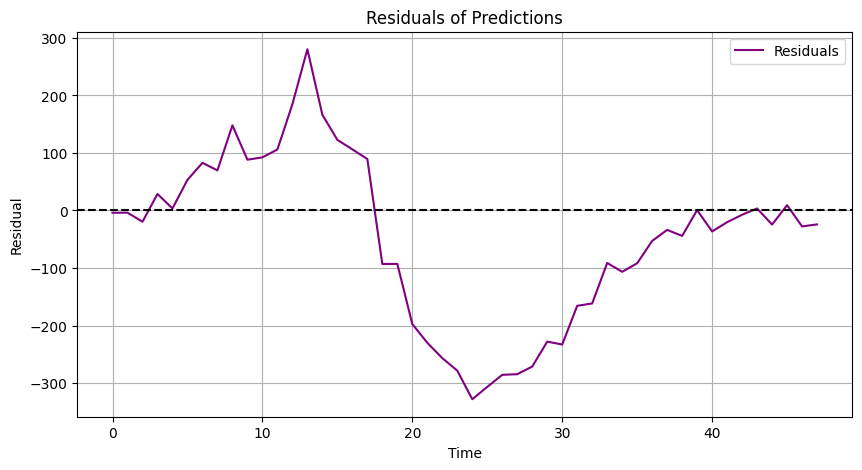

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
--Generated metrics for model: RNN_1_look96_overlap96
MSE = 425.323452
RMSE = 180900.039085
MAPE = 102.066400
sMAPE = 173.711889
MAE = 306.536146
Huber loss = 306.036163


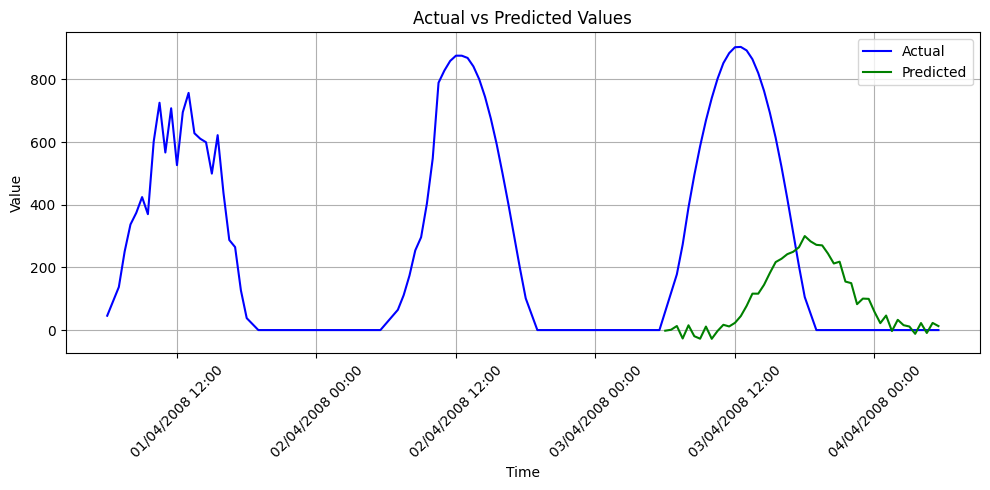

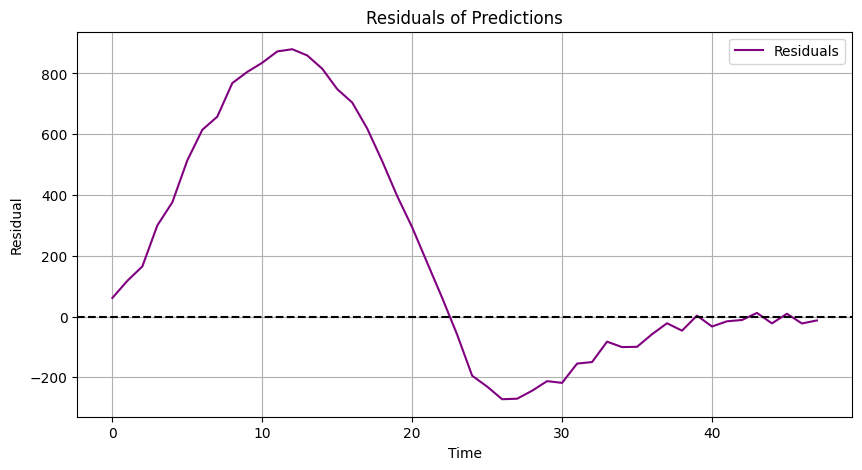

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
--Generated metrics for model: RNN_1_look96_overlap96
MSE = 503.372564
RMSE = 253383.938367
MAPE = 117.857617
sMAPE = 165.675257
MAE = 369.499722
Huber loss = 368.999725


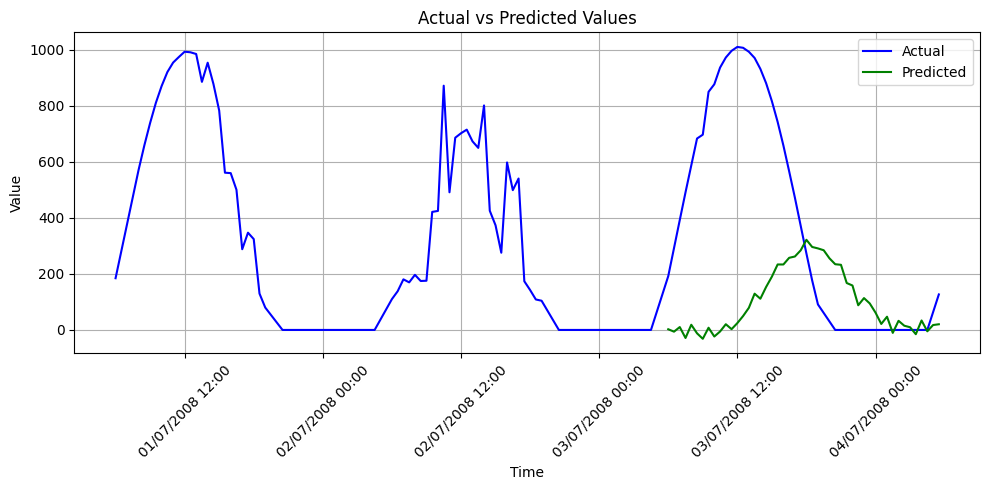

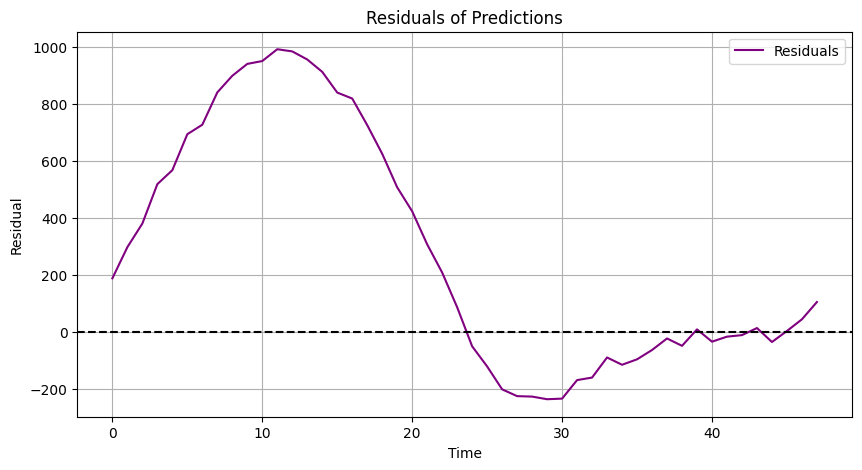

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
--Generated metrics for model: RNN_1_look96_overlap96
MSE = 341.543167
RMSE = 116651.735023
MAPE = 103.534656
sMAPE = 177.296855
MAE = 242.002924
Huber loss = 241.507996


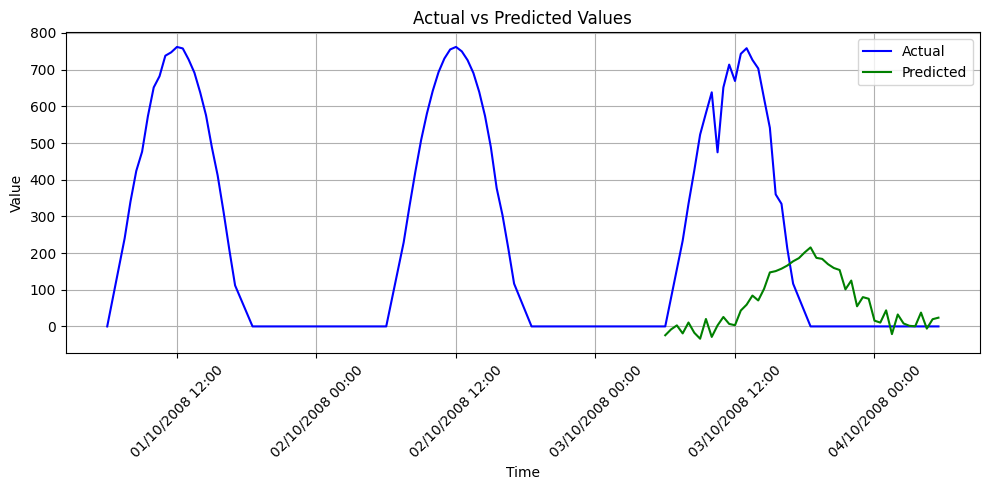

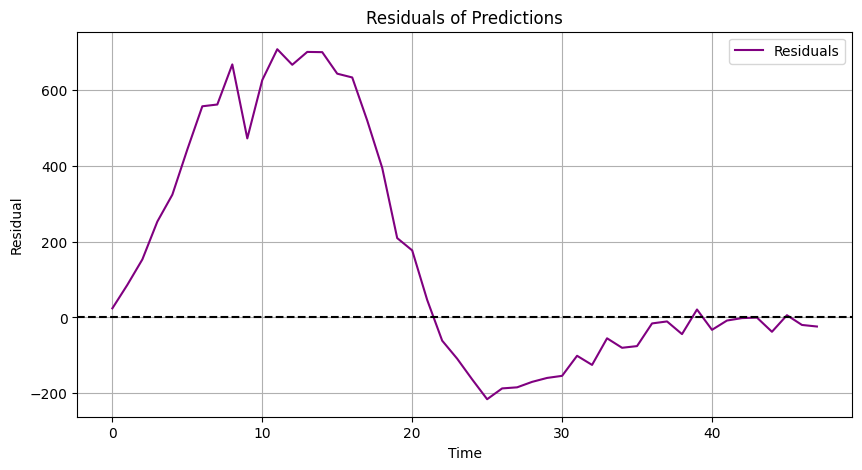

model       val_timestamp            MSE        RMSE  \
0    RNN_1_look48_overlap1 2008-01-01 06:00:00   13704.235576  117.065091   
1    RNN_1_look48_overlap1 2008-04-01 06:00:00    8899.712119   94.338286   
2    RNN_1_look48_overlap1 2008-07-01 06:00:00   15723.449789  125.393181   
3    RNN_1_look48_overlap1 2008-10-01 06:00:00   36191.007654  190.239343   
4    RNN_1_look72_overlap1 2008-01-01 06:00:00   59857.100274  244.657108   
5    RNN_1_look72_overlap1 2008-04-01 06:00:00   12168.555936  110.311178   
6    RNN_1_look72_overlap1 2008-07-01 06:00:00   42480.867193  206.108872   
7    RNN_1_look72_overlap1 2008-10-01 06:00:00    8488.930246   92.135391   
8    RNN_1_look96_overlap1 2008-01-01 06:00:00    6321.931180   79.510573   
9    RNN_1_look96_overlap1 2008-04-01 06:00:00   13345.990955  115.524850   
10   RNN_1_look96_overlap1 2008-07-01 06:00:00   36218.006381  190.310290   
11   RNN_1_look96_overlap1 2008-10-01 06:00:00   15204.957967  123.308386   
12  RNN_1_look48_overlap24 2008-01-01 06:00:00   24986.312783  158.070594   
13  RNN_1_look48_overlap24 2008-04-01 06:00:00  164597.570811  405.706262   
14  RNN_1_look48_overlap24 2008-07-01 06:00:00  115689.153223  340.131082   
15  RNN_1_look48_overlap24 2008-10-01 06:00:00  118140.534590  343.715776   
16  RNN_1_look72_overlap36 2008-01-01 06:00:00    6111.657051   78.177088   
17  RNN_1_look72_overlap36 2008-04-01 06:00:00   30826.752214  175.575489   
18  RNN_1_look72_overlap36 2008-07-01 06:00:00   78887.428933  280.869060   
19  RNN_1_look72_overlap36 2008-10-01 06:00:00   25245.131256  158.887165   
20  RNN_1_look96_overlap48 2008-01-01 06:00:00   21681.130580  147.245138   
21  RNN_1_look96_overlap48 2008-04-01 06:00:00  181410.112701  425.922660   
22  RNN_1_look96_overlap48 2008-07-01 06:00:00  249358.081504  499.357669   
23  RNN_1_look96_overlap48 2008-10-01 06:00:00  115255.011790  339.492285   
24  RNN_1_look48_overlap48 2008-01-01 06:00:00   13729.468462  117.172815   
25  RNN_1_look48_overlap48 2008-04-01 06:00:00  147956.428388  384.651048   
26  RNN_1_look48_overlap48 2008-07-01 06:00:00  100831.703570  317.540082   
27  RNN_1_look48_overlap48 2008-10-01 06:00:00  121478.475195  348.537624   
28  RNN_1_look72_overlap72 2008-01-01 06:00:00   31909.587204  178.632548   
29  RNN_1_look72_overlap72 2008-04-01 06:00:00  165460.859307  406.768803   
30  RNN_1_look72_overlap72 2008-07-01 06:00:00  223488.411242  472.745609   
31  RNN_1_look72_overlap72 2008-10-01 06:00:00  121563.972358  348.660253   
32  RNN_1_look96_overlap96 2008-01-01 06:00:00   23505.392426  153.314684   
33  RNN_1_look96_overlap96 2008-04-01 06:00:00  180900.039085  425.323452   
34  RNN_1_look96_overlap96 2008-07-01 06:00:00  253383.938367  503.372564   
35  RNN_1_look96_overlap96 2008-10-01 06:00:00  116651.735023  341.543167   

          MAPE       sMAPE         MAE  Huber_loss  
0   199.250835  155.648255   94.222741   93.722740  
1    58.103914  111.628654   69.080622   68.601105  
2    37.212894  101.493252   78.586271   78.086266  
3    48.071595  132.577653  139.602054  139.102051  
4   508.749924  166.458368  162.913444  162.413452  
5    23.074646  105.743355   72.233890   71.735542  
6    50.626493  117.579939  154.198829  153.701965  
7    24.024097  112.027537   67.815072   67.315071  
8   164.923743  150.038572   71.163244   70.663246  
9    26.095778  107.770687   80.267708   79.784035  
10   44.554676  109.216108  142.910159  142.410385  
11   31.514745  118.747260   88.367061   87.867065  
12  144.971408  161.264669  119.297798  118.801735  
13  168.465619  166.230298  289.844404  289.344391  
14  107.382828  151.593038  256.316689  255.816696  
15   87.841512  163.593213  249.672076  249.172073  
16  179.884190  148.476433   67.742720   67.244637  
17   37.314098  114.765919  121.644791  121.144798  
18   49.232052  114.121336  201.787979  201.287979  
19   36.686569  121.817500  111.840821  111.340973  
20  227.517716  175.402880  110.932641  110.432640  
21  1

In [6]:
data_for_eval = DataSelectionForEvaluator(dataset)
time_stamps = ['2008-01-01 06:00:00', '2008-04-01 06:00:00', '2008-07-01 06:00:00', '2008-10-01 06:00:00']
metrics = []
for model_conf in model_configurations:
    model = env_dir_options.load_model(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}.keras'))
    history = json.load(open(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_history.json')))
    scaler_x = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_x.pkl'))
    scaler_y = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_y.pkl'))
    flg_history = True

    # Evaluation of the model in different timestamps

    for iter, time_stamp in enumerate(time_stamps):
        y_true, y_pred, extended_y_true = data_for_eval.data_selection(model_=model,
                                                                       time_stamp=time_stamp,
                                                                       num_look_back_steps=model_conf["model"]["training"][
                                                                           "n_past_steps"],
                                                                       num_forecast_steps=model_conf["model"]["training"][
                                                                           "n_forecast_steps"],
                                                                       columns_for_training=
                                                                       model_conf["model"]["training"][
                                                                           "columns_for_training"],
                                                                       scaler_x=scaler_x,
                                                                       scaler_y=scaler_y,
                                                                       date_index="timestamp",
                                                                       target_column="GHI")
    
        evaluator = ModelEvaluator(y_true, y_pred)
        evaluator.performance_report(history_vars=history, model_name=model_conf["model"]["name"], flg_history=flg_history,
                                     extended_y_true=extended_y_true, N_STEPS=model_conf["model"]["training"]["n_past_steps"])
        flg_history = False
        metrics.append({"model": model_conf["model"]["name"],
                        "val_timestamp": pd.to_datetime(time_stamp),
                        "MSE": evaluator.calculate_mse(),
                        "RMSE": evaluator.calculate_rmse(),
                        "MAPE": evaluator.calculate_mape(),
                        "sMAPE": evaluator.calculate_smape(),
                        "MAE": evaluator.calculate_mae(),
                        "Huber_loss": float(evaluator.calculate_huber_loss())})
        # if iter == 0:
        #     evaluator.plot_loss(history, 'Huber loss')
        # evaluator.plot_residuals()
        # evaluator.plot_actual_vs_predicted(extended_y_true, model_conf["model"]["training"]["n_past_steps"])

pd.DataFrame(metrics)